# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

 ___

## 1.1 Data Import

In [76]:
#Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [77]:
#Importing the dataset
raw_df = pd.read_csv("data/Wholesale_Data.csv")

In [78]:
#Shape of raw data
raw_df.shape

(440, 8)

In [79]:
#Top head of raw data
raw_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [80]:
#Raw data features
raw_df_columns = list(raw_df.columns)
raw_df_columns

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

#### Data Import Summary:
1. The data set has 440 rows with 8 columns
2. The column names are composed of two location categories columns (Channel, Region) and six wholesale good category columns (Fresh, Milk, Grocery, Frozen, Detergent_Paper and Delicassen)

 ___

## 1.2 Data Audit

In [81]:
#Checking for null values
raw_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [82]:
#Checking for Zero values
get_zeros(raw_df)

Channel Zero Values:  0
Region Zero Values:  0
Fresh Zero Values:  0
Milk Zero Values:  0
Grocery Zero Values:  0
Frozen Zero Values:  0
Detergents_Paper Zero Values:  0
Delicassen Zero Values:  0


In [83]:
#Checking for duplicate rows
raw_df.duplicated().value_counts()

False    440
dtype: int64

In [84]:
#Checking the data types for each columns
raw_df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### Data Audit Summmary:
1. There are no null values
2. There are no zero values
3. There are no duplicate rows
4. All eight columns have integer values

 ___

## 1.3 Grouping Datasets

### 1.3.1 Grouping Datasets - Channel

In [85]:
#Check for different channel values
raw_df["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [86]:
#Group 1: Channel == 1
raw_df_channel1 = pd.DataFrame(raw_df[raw_df["Channel"] == 1])

#Group 2: Channel == 2
raw_df_channel2 = pd.DataFrame(raw_df[raw_df["Channel"] == 2])

In [87]:
print("Channel 1 Shape: ", raw_df_channel1.shape)
print("Channel 2 Shape: ", raw_df_channel2.shape)

Channel 1 Shape:  (298, 8)
Channel 2 Shape:  (142, 8)


### 1.3.2 Grouping Datasets - Region

In [88]:
#Checking for different region values
raw_df["Region"].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [89]:
#Group 1: Region == 1
raw_df_region1 = pd.DataFrame(raw_df[raw_df["Region"] == 1])

#Group 2: Region == 2
raw_df_region2 = pd.DataFrame(raw_df[raw_df["Region"] == 2])

#Group 3: Region == 3
raw_df_region3 = pd.DataFrame(raw_df[raw_df["Region"] == 3])

In [90]:
print("Region 1 Shape: ", raw_df_region1.shape)
print("Region 2 Shape: ", raw_df_region2.shape)
print("Region 3 Shape: ", raw_df_region3.shape)

Region 1 Shape:  (77, 8)
Region 2 Shape:  (47, 8)
Region 3 Shape:  (316, 8)


#### Grouping Dataset Summary:
1. There are two groups by Channell, Channel 1 and Channel 2
2. There are three groups by Region, Region 1, Region 2 and Region 3

 ___

## 1.4 PRELIMINARY EDA

### 1.4.1 Data Frequency Distribution
###      1.4.1.1 Data Frequency Distribution of the Full Raw Dataset

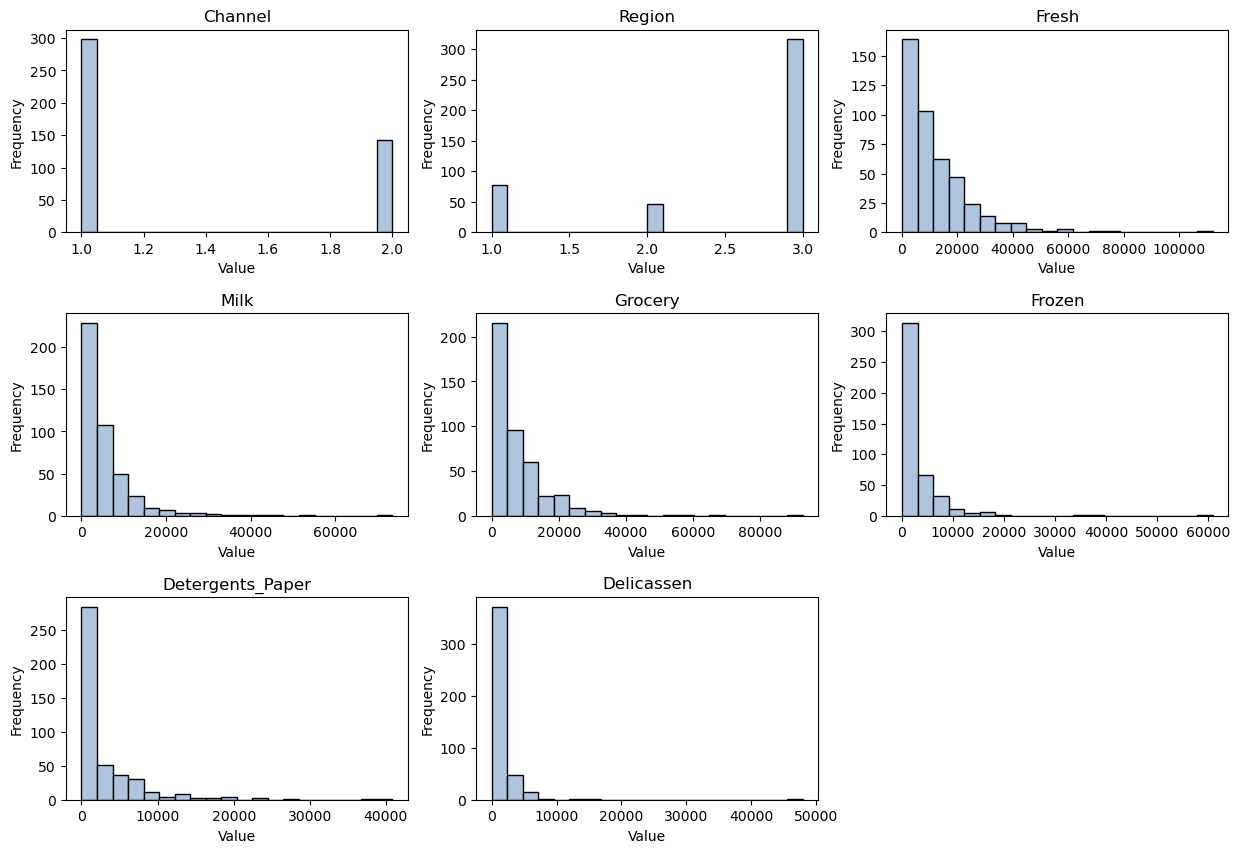

In [91]:
#Distribution of data in full raw dataset
make_hist(raw_df)

### 1.4.1.2 Data Frequency Distribution by Channel

#### 1.4.1.2a - Data Frequency Distribution - Channel 1 Dataset

CHANEL 1


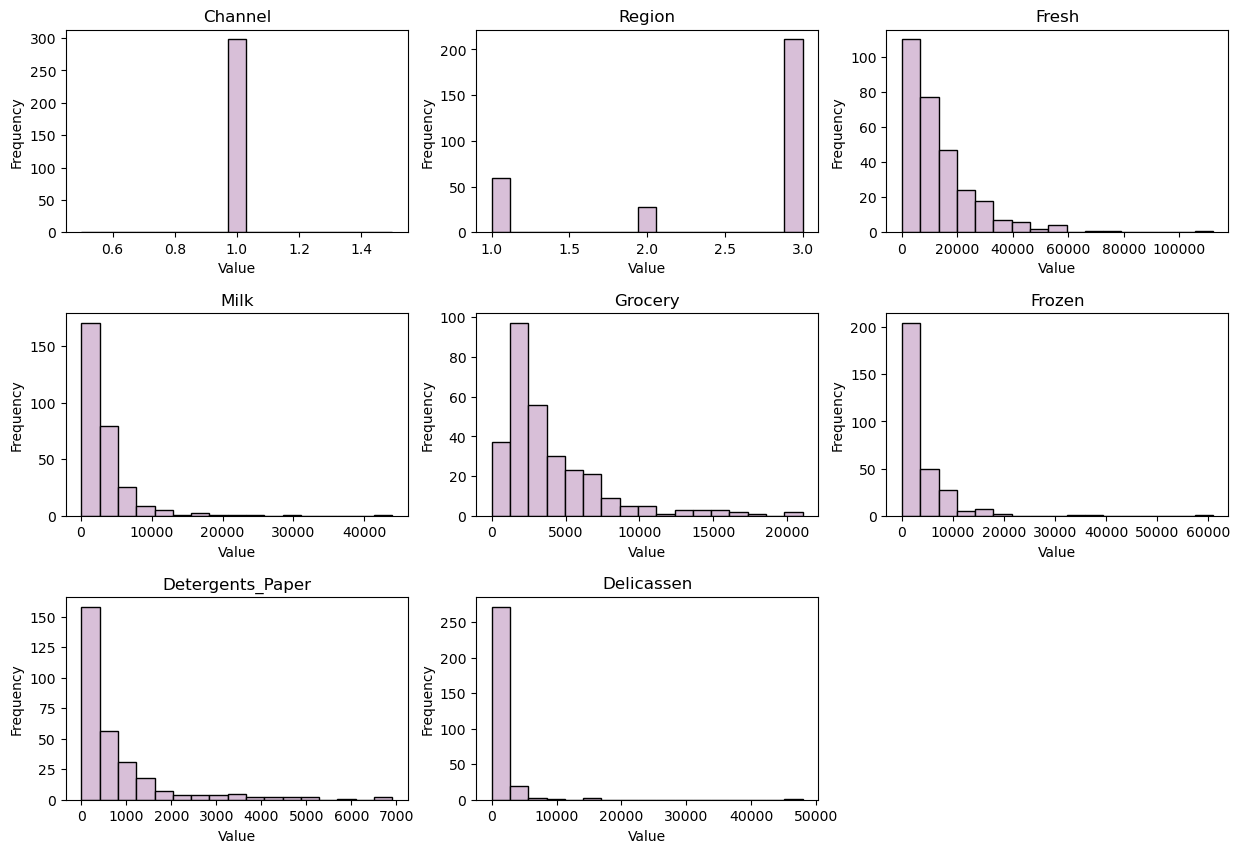

In [92]:
#Distribution of data by eac channels dataset - Channel 1
print("CHANEL 1")
make_hist(raw_df_channel1,colour="thistle")

#### 1.4.1.2b Data Frequency Distribution - Channel 2 Dataset

CHANNEL 2


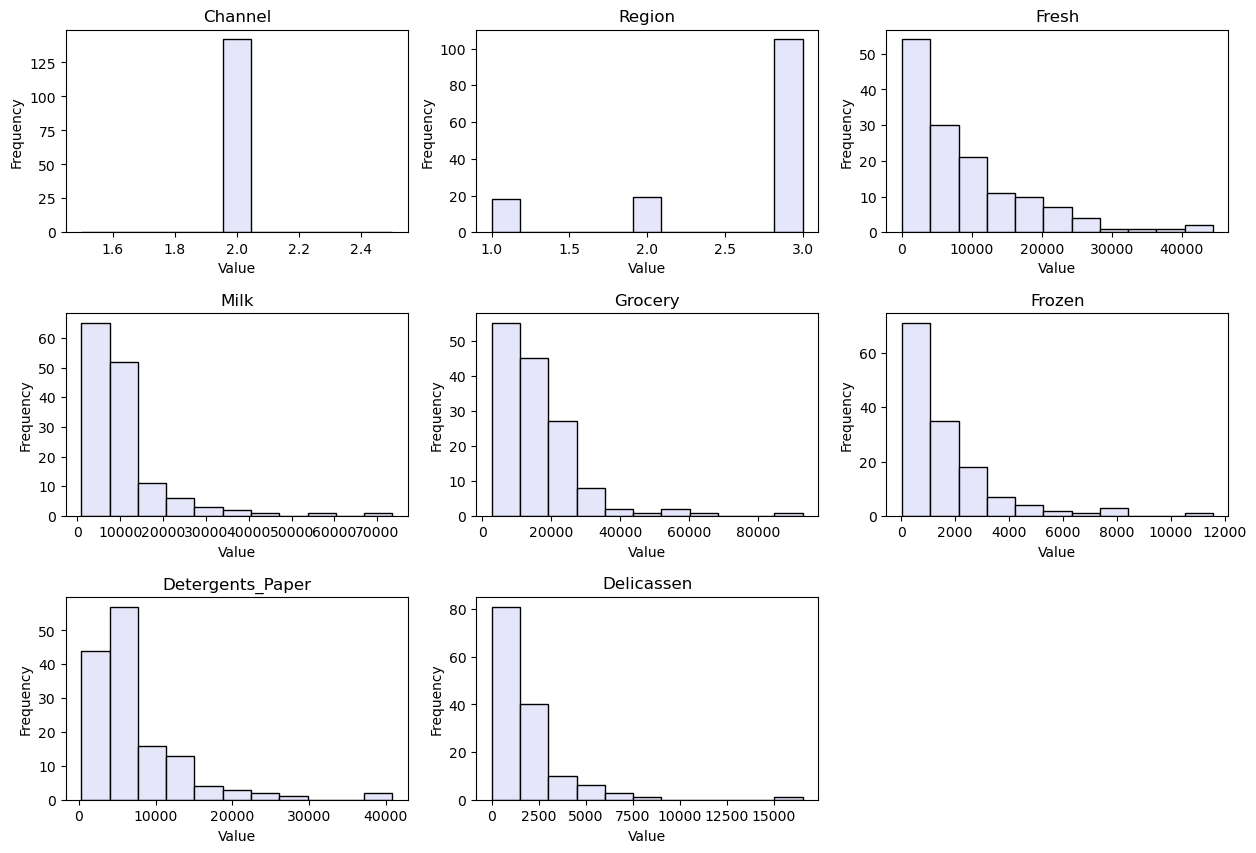

In [93]:
print("CHANNEL 2")
make_hist(raw_df_channel2,colour="lavender")


### 1.4.1.3 Data Frequency Distribution by Region

#### 1.4.1.3a Data Frequency Distribution - Region 1 Dataset

REGION 1


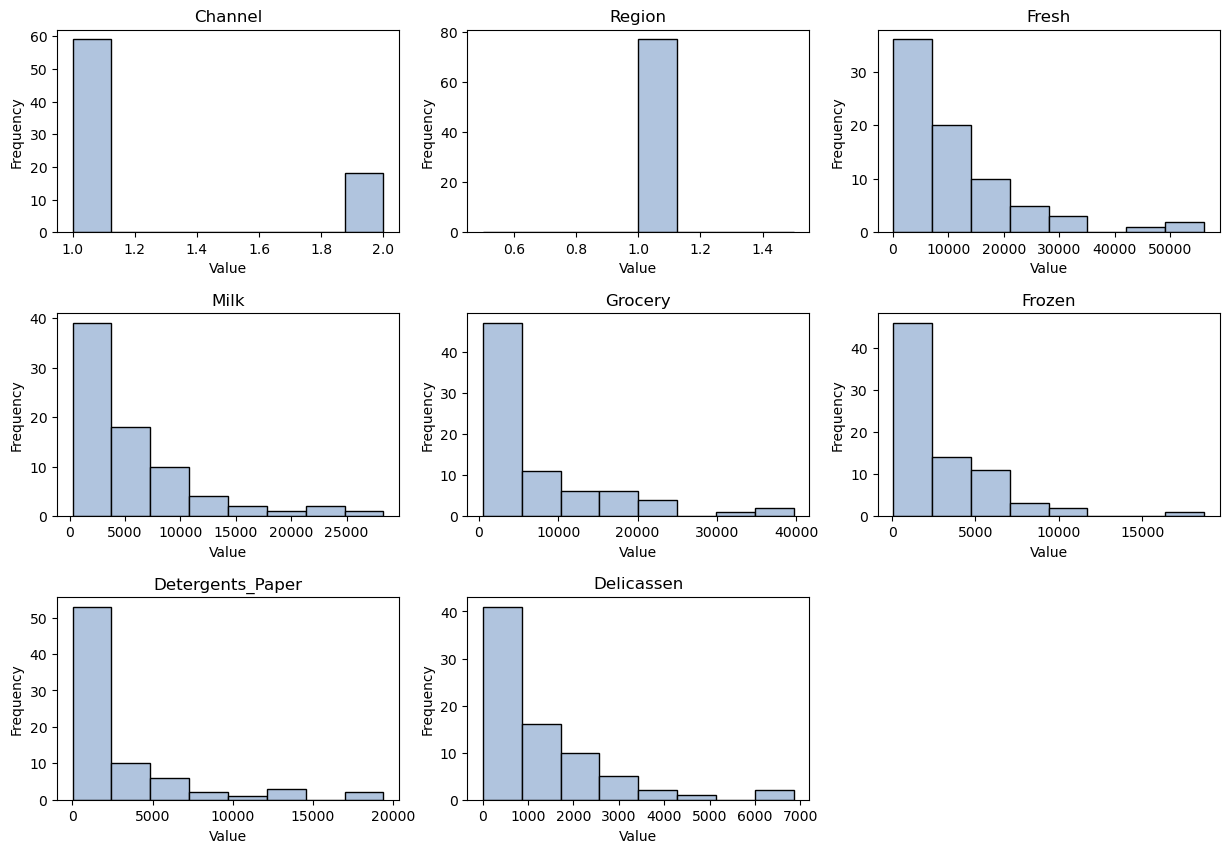

In [94]:
print("REGION 1")
make_hist(raw_df_region1)

#### 1.4.1.3b Data Frequency Distribution - Region 2 Dataset

REGION 2


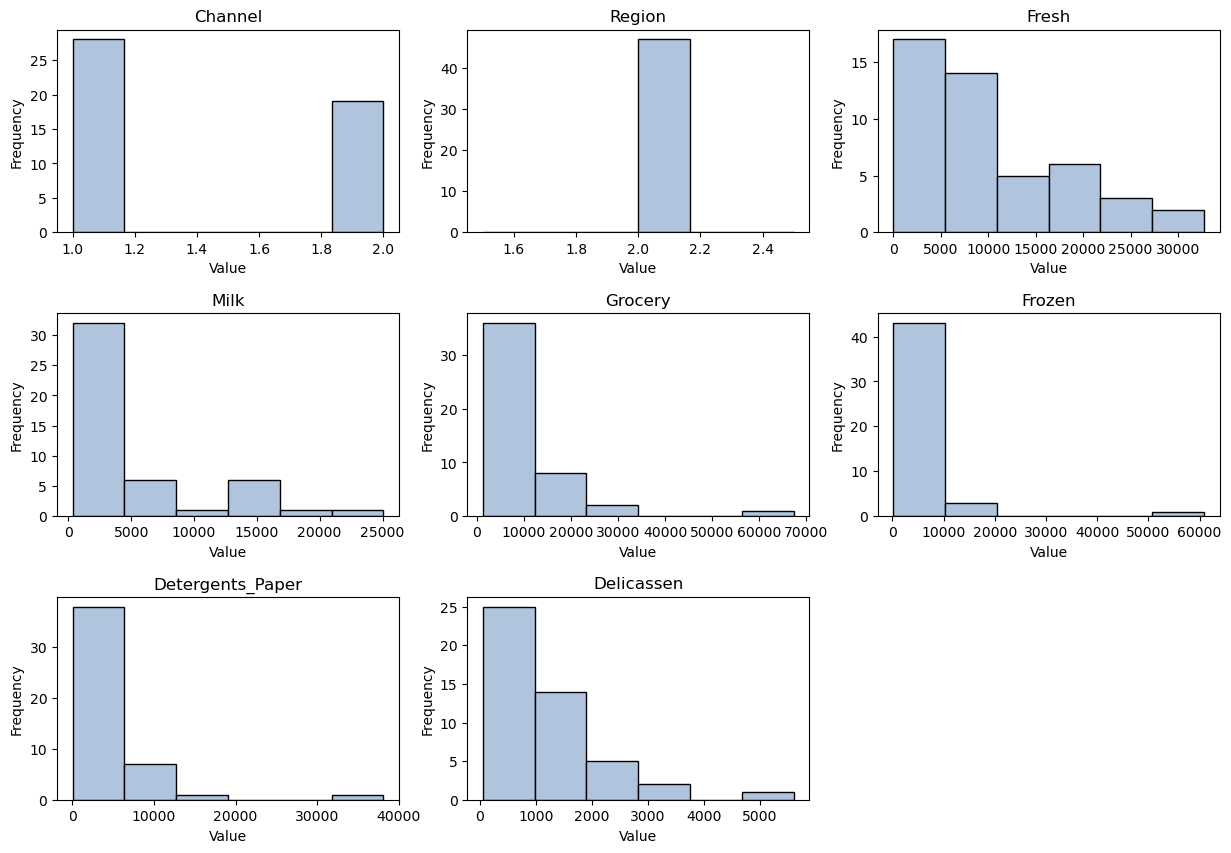

In [95]:
print("REGION 2")
make_hist(raw_df_region2)

#### 1.4.1.3c Data Frequency Distribution - Region 3 Dataset

REGION 3


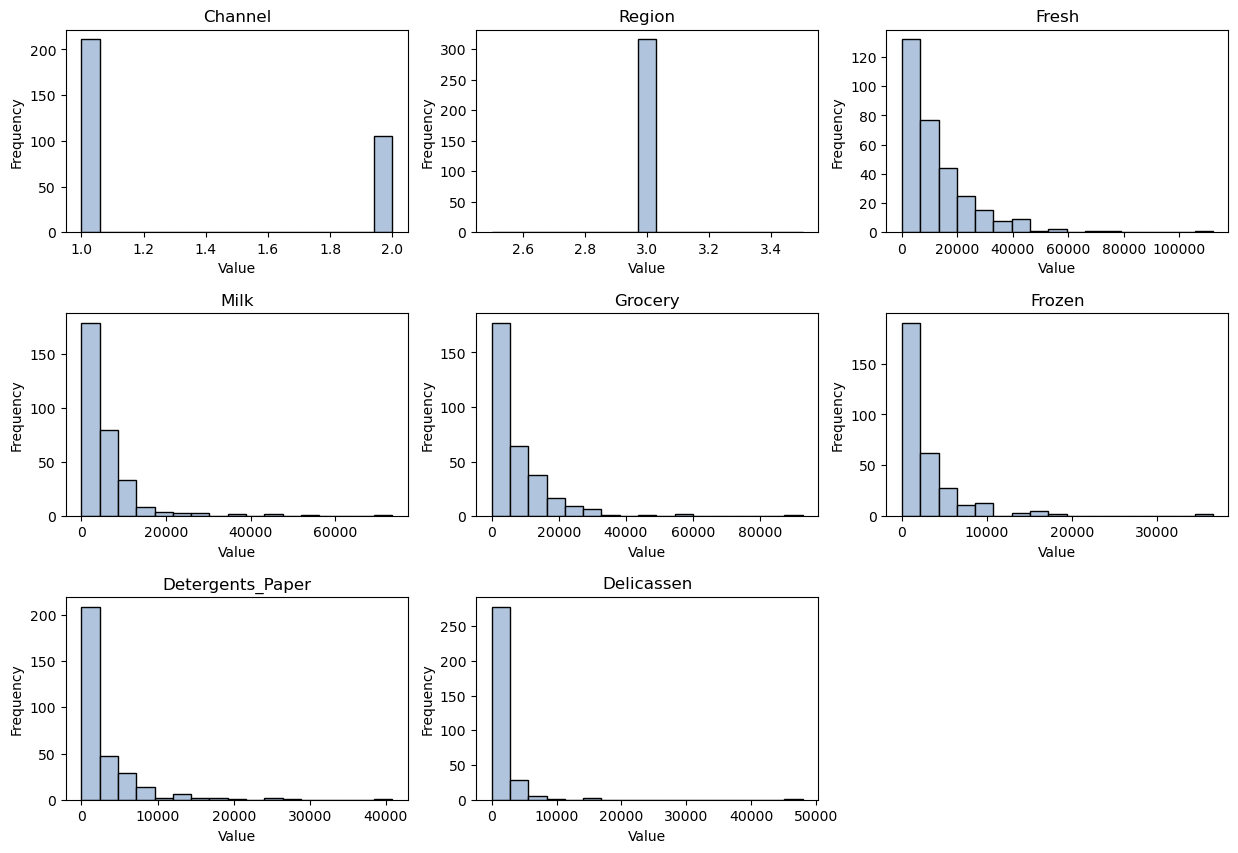

In [96]:
print("REGION 3")
make_hist(raw_df_region3)

 #### Data Frequeency Distribution Summary
 
 1. Overall, it is evident and clear that all features regardless of groups are skewed to the left. Which means that all wholesale products, in all channels and regions, are mostly bought in smaller quantities.

### 1.4.2 Data Distribution Ratio by Channel and Region

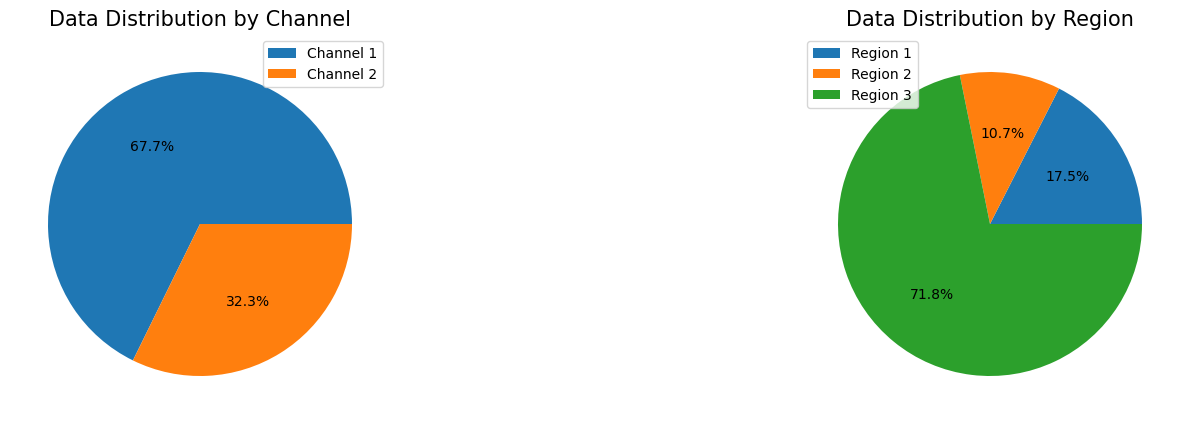

In [97]:
whitespace(1) #adds whitespace


plt.figure(figsize=(12, 10))

#Data Distribution Ratio by Channels
pie1 = plt.subplot(1, 3, 1)
pie1.pie([len(raw_df_channel1), len(raw_df_channel2)], autopct='%1.1f%%')
pie1.set_title("Data Distribution by Channel", fontsize=15)
pie1.legend( labels=["Channel 1", "Channel 2"])

#Data Distribution Ratio by Regions
pie2 = plt.subplot(1, 3, 3)
pie2.pie([len(raw_df_region1), len(raw_df_region2), len(raw_df_region3)], autopct='%1.1f%%')
pie2.set_title("Data Distribution by Region", fontsize=15)
pie2.legend(labels=["Region 1", "Region 2", "Region 3"])


plt.tight_layout()
plt.show()

 #### Data Distribution Ratio Summary
 1. Two-thirds of the raw data set belongs to Channel Group 1 while the remaining 30% belongs to Channel Group 2.
 2. More than 60% of the data in the raw dataset are from Region 3 while the remaining 30% are from to Regions 1 and 2.
 

### 1.4.3 Data Summary Statistics

In [98]:
#all dataset summary statistics
sumstat_rdf = raw_df.describe()

#dataset by Channel summary statistics
sumstat_channel1 = raw_df_channel1.describe()
sumstat_channel2 = raw_df_channel2.describe()

#dataset by Region summary statistics
sumstat_region1 = raw_df_region1.describe()
sumstat_region2 = raw_df_region2.describe()
sumstat_region3 = raw_df_region3.describe()

In [99]:
#Summary Statistics Index
sumstat_index = sumstat_rdf.index

#Dataset Columns
sumstat_columns = list(sumstat_rdf.columns)

#Summary Statistics Group Names
sumstat_groupname = ['All', 'Channel 1', 'Channel 2', 'Region 1', 'Region 2', 'Region 3']

In [100]:
#Getting the mean of all categories in each group of dataset
rdf_mean = list(sumstat_rdf.loc["mean"].values)
channel1_mean = list(sumstat_channel1.loc["mean"].values)
channel2_mean = list(sumstat_channel2.loc["mean"].values)
region1_mean = list(sumstat_region1.loc["mean"].values)
region2_mean = list(sumstat_region2.loc["mean"].values)
region3_mean = list(sumstat_region3.loc["mean"].values)

#Dataframe of all the mean per dataset group
mean_df = pd.DataFrame((rdf_mean,channel1_mean,channel2_mean,region1_mean,region2_mean,region3_mean), 
                       columns=sumstat_columns, index=sumstat_groupname)

In [101]:
columns = list(sumstat_rdf.columns)

channel_means = dict()
for i in range(len(columns)):
    channel_means[columns[i]] = channel1_mean[i], channel2_mean[i]

region_means = dict()
for i in range(len(columns)):
    region_means[columns[i]] = region1_mean[i], region2_mean[i],region3_mean[i]

#### 1.4.3a Highest Mean for Each Categories in Channel Group Datasets

In [102]:
group_name = ["Channel 1", "Channel 2"]
highest_mean = list(({key: max(values) for key, values in channel_means.items()}).values())
highest_mean_group_index = list(({key: values.index(max(values)) for key, values in channel_means.items()}).values())
highest_mean_group = [group_name[i] for i in highest_mean_group_index]


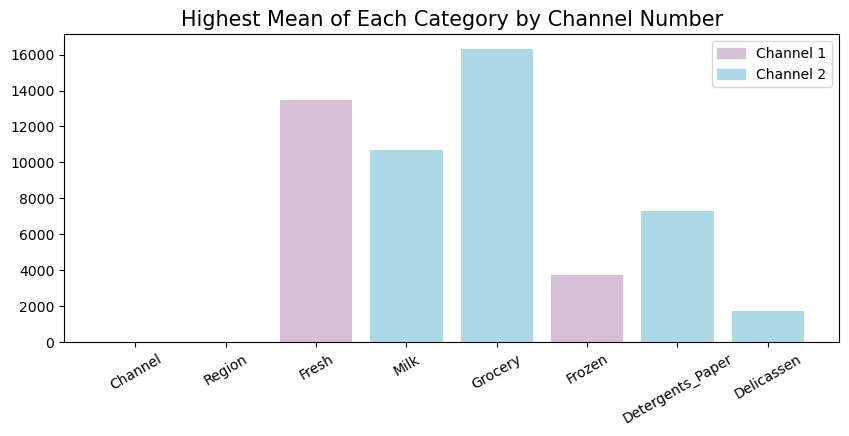

In [103]:
y = highest_mean
mean_cat = highest_mean_group
x = list(sumstat_rdf.columns)


plt.figure(figsize=(10,4))
bars = plt.bar(0,0)
# for i in range(len(columns)):
for i in range(len(y)):
    if (mean_cat[i] == "Channel 1"):
        bars += plt.bar(x[i],y[i], color="thistle")
    else:
        bars += plt.bar(x[i],y[i], color="lightblue")
        
    
plt.xticks(rotation=30)
plt.title("Highest Mean of Each Category by Channel Number", fontsize=15)


legend = plt.legend(group_name)
legend.get_texts()[0].set_text('Channel 1')  # Customize label for Channel A
legend.get_texts()[1].set_text('Channel 2')  # Customize label for Channel B
legend.legendHandles[0].set_color('thistle')  # Customize color for Channel A in the legend
legend.legendHandles[1].set_color('lightblue')  # Customize color for Channel B in the legend

    
plt.show()

1. Channel 1 have seen a higher average mean for quantity sold wholesale products in Fresh and Frozen departments.
2. Channel 2 have seen a higher average mean for quantity sold wholesale products in Milk, Grocery, Detergents Paper and Delicasen.

From the observations above, we can imply that Channel 1 have sold wholesale products like fresh produce, meat, frozen food and frozen vegetables that have a considerably earlier expiration dates.

We can also imply that Channel 2 products are usually products which likely have an expiration date that is longer. The milk category can be a group of products that is made from milk such as cheese or powdered milk.

In [104]:
group_name = ["Region 1", "Region 2", "Region 3"]
highest_mean = list(({key: max(values) for key, values in region_means.items()}).values())
highest_mean_group_index = list(({key: values.index(max(values)) for key, values in region_means.items()}).values())
highest_mean_group = [group_name[i] for i in highest_mean_group_index]


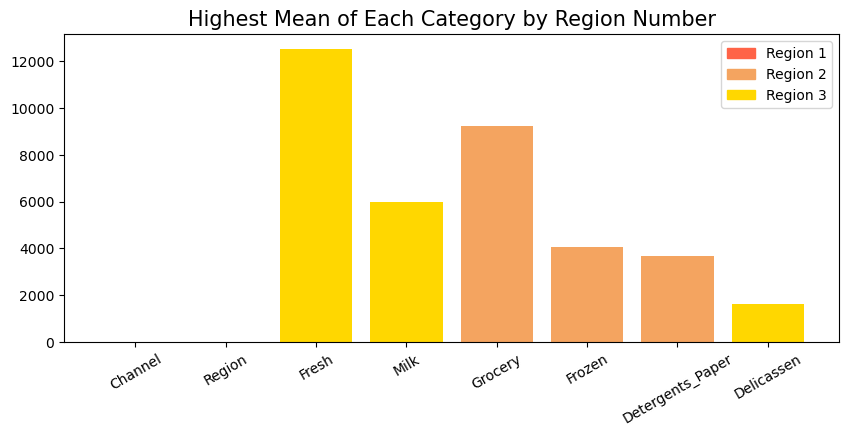

In [105]:
y = highest_mean
mean_cat = highest_mean_group
x = list(sumstat_rdf.columns)


plt.figure(figsize=(10,4))
bars = plt.bar(0,0)
# for i in range(len(columns)):
for i in range(len(y)):
    if (mean_cat[i] == "Region 1"):
        bars += plt.bar(x[i],y[i], color="tomato")
    elif (mean_cat[i] == "Region 2"):
        bars += plt.bar(x[i],y[i], color="sandybrown")
    else:
        bars += plt.bar(x[i],y[i], color="gold")

    
plt.xticks(rotation=30)
plt.title("Highest Mean of Each Category by Region Number", fontsize=15)

# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}', ha='center', va='bottom', color='gray')

legend = plt.legend(group_name)
legend.get_texts()[0].set_text('Region 1')  # Customize label for Channel A
legend.get_texts()[1].set_text('Region 2')  # Customize label for Channel B
legend.get_texts()[2].set_text('Region 3')  # Customize label for Channel B
legend.legendHandles[0].set_color('tomato')  # Customize color for Channel A in the legend
legend.legendHandles[1].set_color('sandybrown')  # Customize color for Channel B in the legend
legend.legendHandles[2].set_color('gold')  # Customize color for Channel B in the legend


    
plt.show()

1. Region 1 have an average mean of wholesale products sold that is lower than both Region 2 and Region 3 in all categories.
2. Region 2 have sold a higher average mean products in grocery, frozen and detergent_paper.
3. Region 3 have sold a higher average mean products in fresh, milk and delicassens product.

From this information, we can imply that grocers from Region 3 have bough more fresh or healthier options of products compared to Region 3 which have seen more average product sold in grocery and frozen categories which are likely heavily processed food.

### 1.4.4 Outlier Detection

#### 1.4.4a Determine the Outliers

In [106]:
raw_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [107]:
#Detect outliers using the zscore of each dataset and treat anythin above or below z=2 as outliers
raw_df_outliers = detect_outliers_zscore(raw_df.drop(columns=["Region", "Channel"]))

channel1_df_outliers = detect_outliers_zscore(raw_df_channel1.drop(columns=["Region", "Channel"]))
channel2_df_outliers = detect_outliers_zscore(raw_df_channel2.drop(columns=["Region", "Channel"]))

region1_df_outliers = detect_outliers_zscore(raw_df_region1.drop(columns=["Region", "Channel"]))
region2_df_outliers = detect_outliers_zscore(raw_df_region2.drop(columns=["Region", "Channel"]))
region3_df_outliers = detect_outliers_zscore(raw_df_region3.drop(columns=["Region", "Channel"]))

#### 1.4.4b Visualize the Outliers

ALL DATA


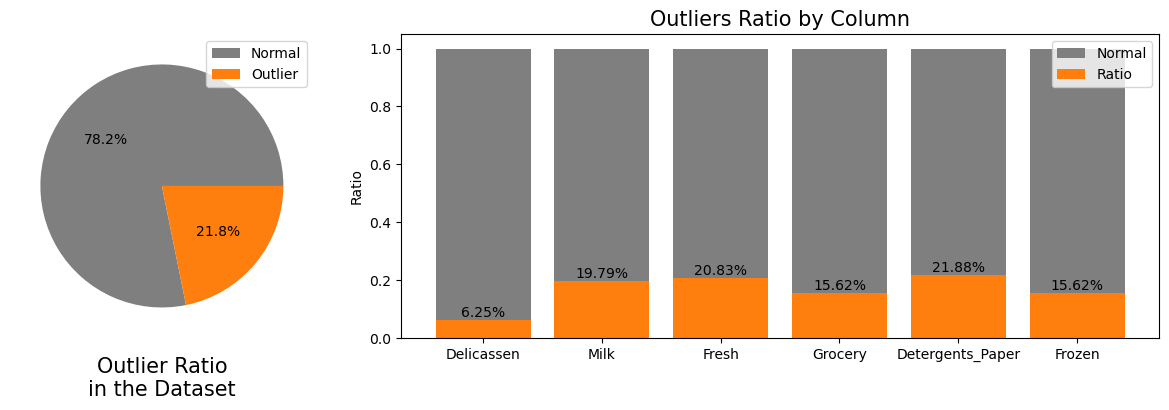

In [108]:
print("ALL DATA")
raw_df_outliers_viz = visualize_outliers(raw_df_outliers)
whitespace(2)

1. In general, more than 20% of the overall dataset are outliers by setting the thresehold to 2 z-score away from the mean.
2. The majority of the outliers are from Detergent Paper, Fresh and Milk categories.

DATASET BY CHANNEL - CHANNEL 1


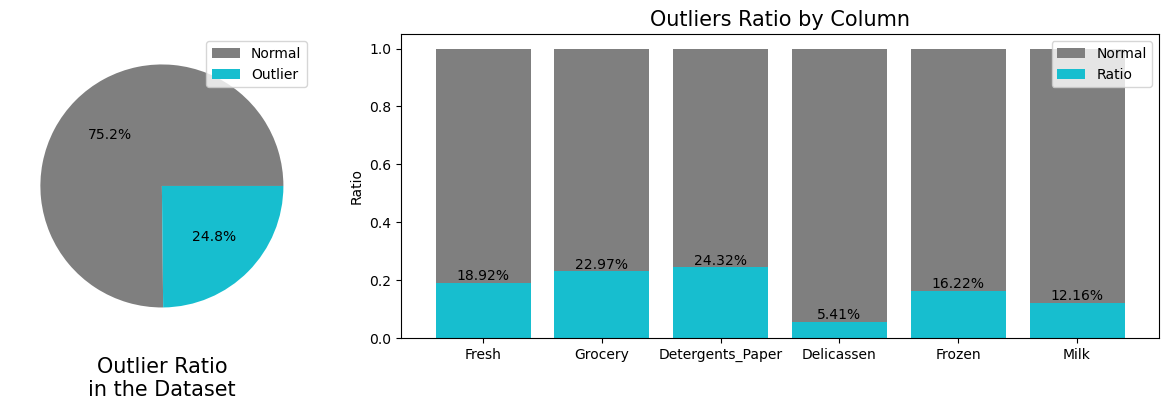



DATASET BY CHANNEL - CHANNEL 2


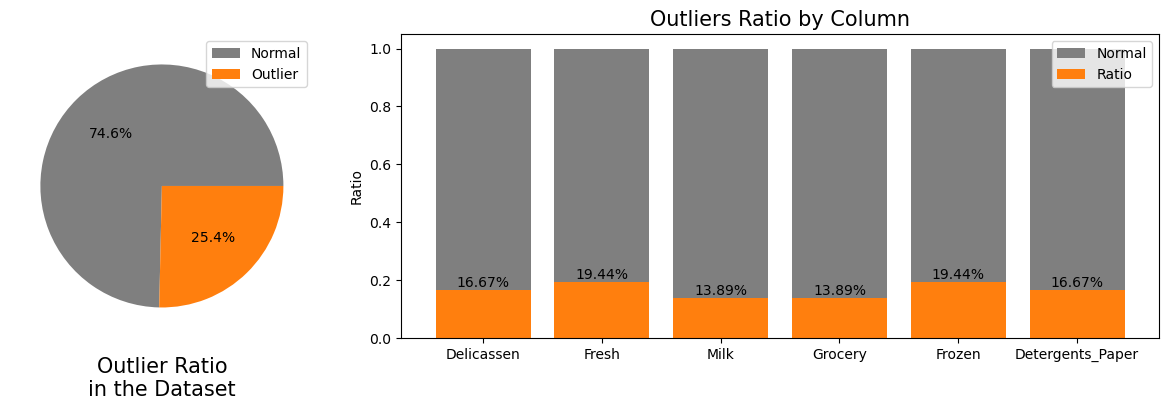

In [109]:
print("DATASET BY CHANNEL - CHANNEL 1")
channel1_df_outliers_viz = visualize_outliers(channel1_df_outliers, color="cyan")
whitespace()
print("DATASET BY CHANNEL - CHANNEL 2")
channel2_df_outliers_viz = visualize_outliers(channel2_df_outliers, color="orange")
whitespace(2)

1. Channels 1 and 2 have have relatively the same outlier ratio as the outliers in the whole dataset.

DATASET BY REGION - REGION 1


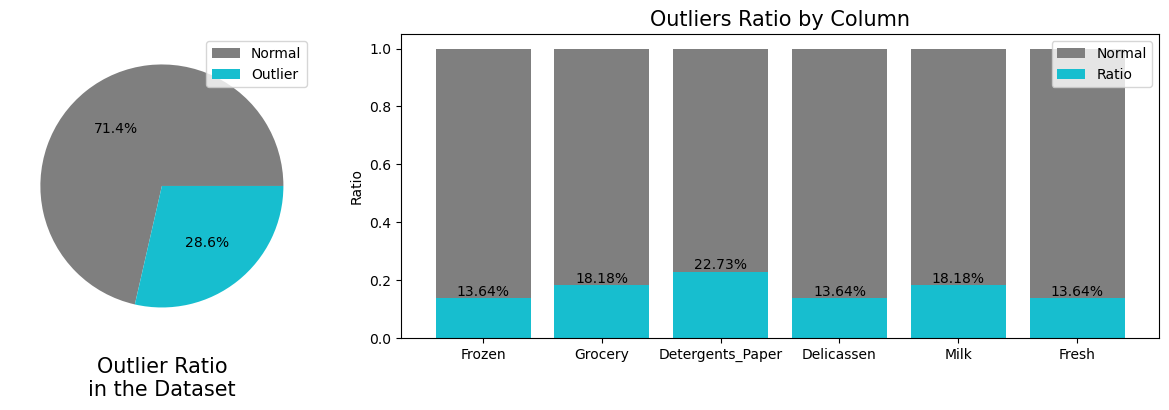



DATASET BY REGION - REGION 2


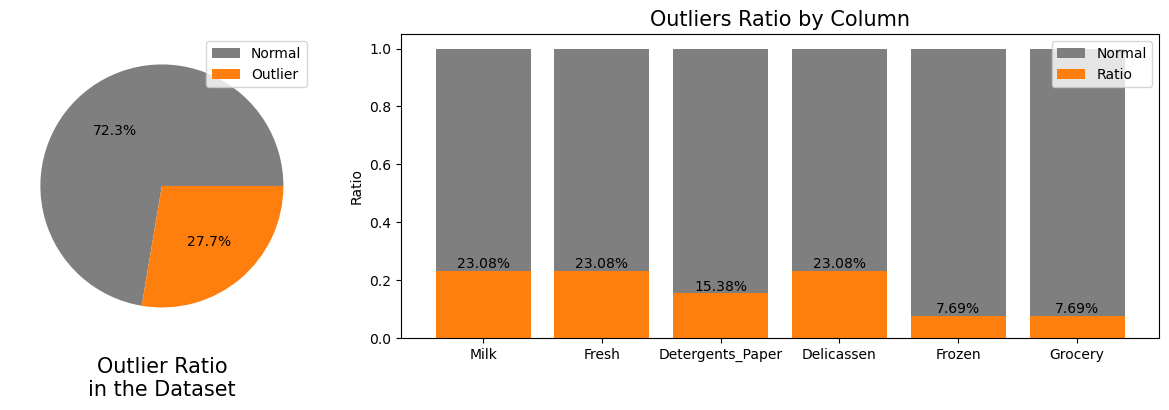



DATASET BY REGION - REGION 3


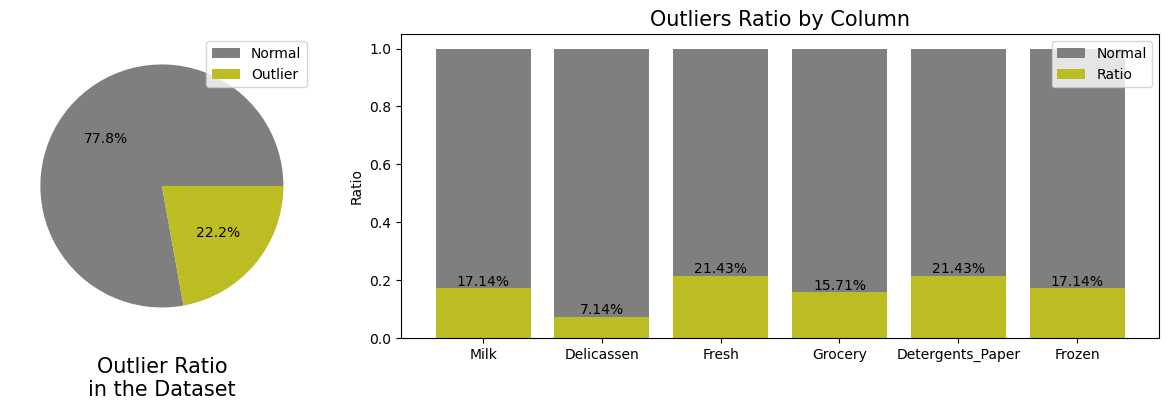

In [110]:
print("DATASET BY REGION - REGION 1")
region1_df_outliers_viz = visualize_outliers(region1_df_outliers, color="cyan")
whitespace()
print("DATASET BY REGION - REGION 2")
region2_df_outliers_viz = visualize_outliers(region2_df_outliers, color="orange")
whitespace()
print("DATASET BY REGION - REGION 3")
region3_df_outliers_viz = visualize_outliers(region3_df_outliers, color="olive")
whitespace(2)

1. Region 3 have relatively the same outlier ratio as the outliers in the whole dataset while Regions 1 and 2 have a relatively higher outliers ratio.
2. The dataset will be divided into two, a dataset with outliers and a dataset that is cleaned off from outliers and channels and regions removed

## 1.5 Data Cleaning

## Feature Selection

In [111]:
#All values dataframe
df = raw_df.copy()
df = df.drop(columns=["Region", "Channel"])

#Cleaned values dataframe
df_ = raw_df.copy()
df_ = df_.drop(columns=["Region", "Channel"])

### 1.5.1 Removing Outliers  by Z-Score threshold z = 2

In [112]:
#All values dataframe outlier indexes where outliers are values outside z-score = +/- 2
outliers_index = (raw_df_outliers["value_index"])
df_ = df_.drop(outliers_index).reset_index(drop=True)
df_.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788
3,22615,5410,7198,3915,1777,5185
4,9413,8259,5126,666,1795,1451


### 1.5.2 Shape of the dataset after removing the considered outliers

Distribution of data before removing the first set of values that exceeds z=2 threshold


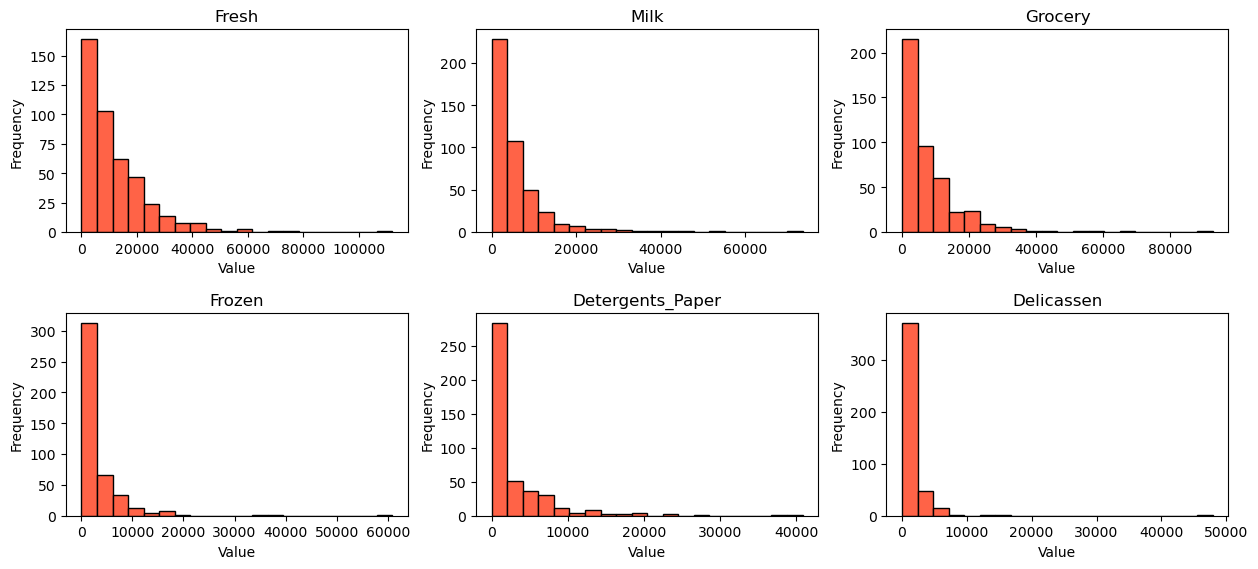



Distribution of data after removing the first set of values that exceeds z=2 threshold


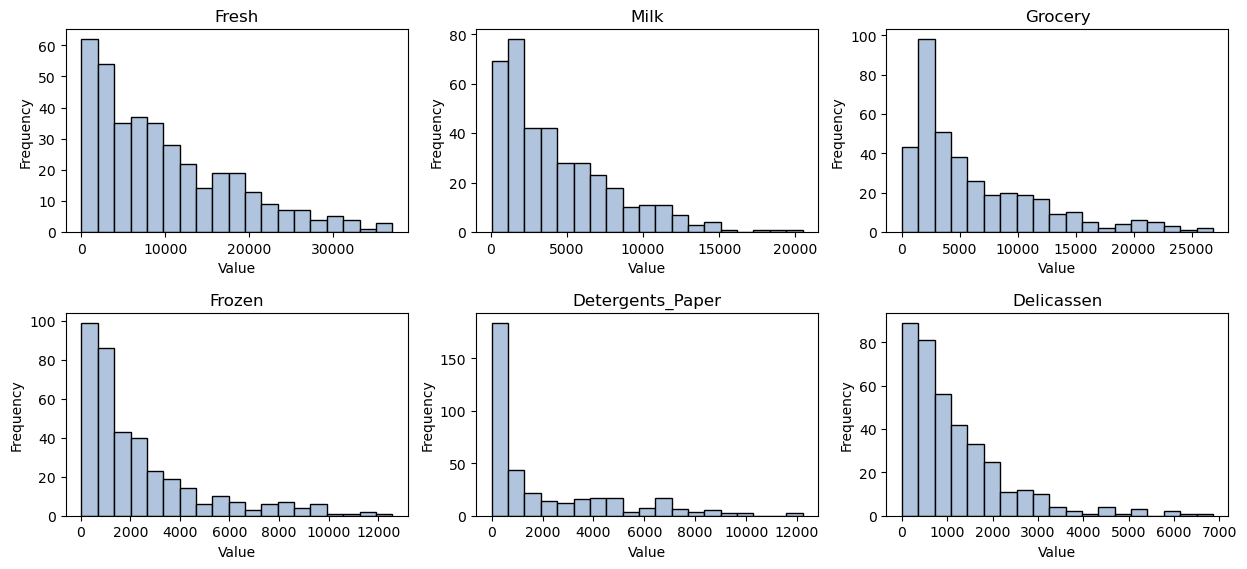

In [113]:
print("Distribution of data before removing the first set of values that exceeds z=2 threshold")
make_hist(df, colour="tomato")
whitespace()
print("Distribution of data after removing the first set of values that exceeds z=2 threshold")
make_hist(df_)

### 1.5.3 Introduction of new outliers

In [114]:
df_outliers = detect_outliers_zscore(df)
df_outliers_ = detect_outliers_zscore(df_)

In [191]:
df_.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788
3,22615,5410,7198,3915,1777,5185
4,9413,8259,5126,666,1795,1451


All values dataframe with Outliers/Values outside the +/-2 z-score Threshold


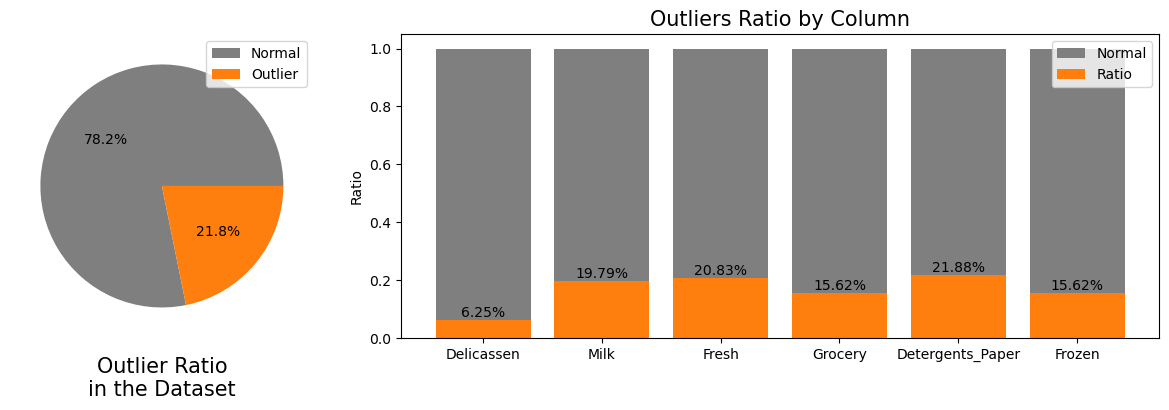



Outliers/Values outside the +/-2 z-score Threshold After removing the first set of outliers


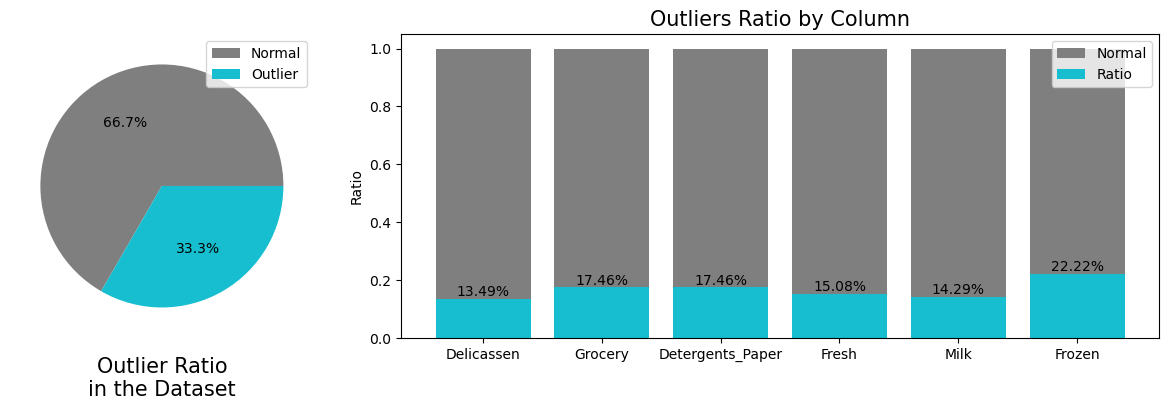

In [116]:

#Comparing the outlier ratio berween uncleaned and cleaned datasets
print("All values dataframe with Outliers/Values outside the +/-2 z-score Threshold")
df_outliers_viz = visualize_outliers(df_outliers)
whitespace()
print("Outliers/Values outside the +/-2 z-score Threshold After removing the first set of outliers")
df_outliers_viz_ = visualize_outliers(df_outliers_, color="cyan")
whitespace(2)


### 1.5.4 Comparing the boxplots of datasets before and after removing the outliers

Boxplot of all dataset berfore removing the outliers


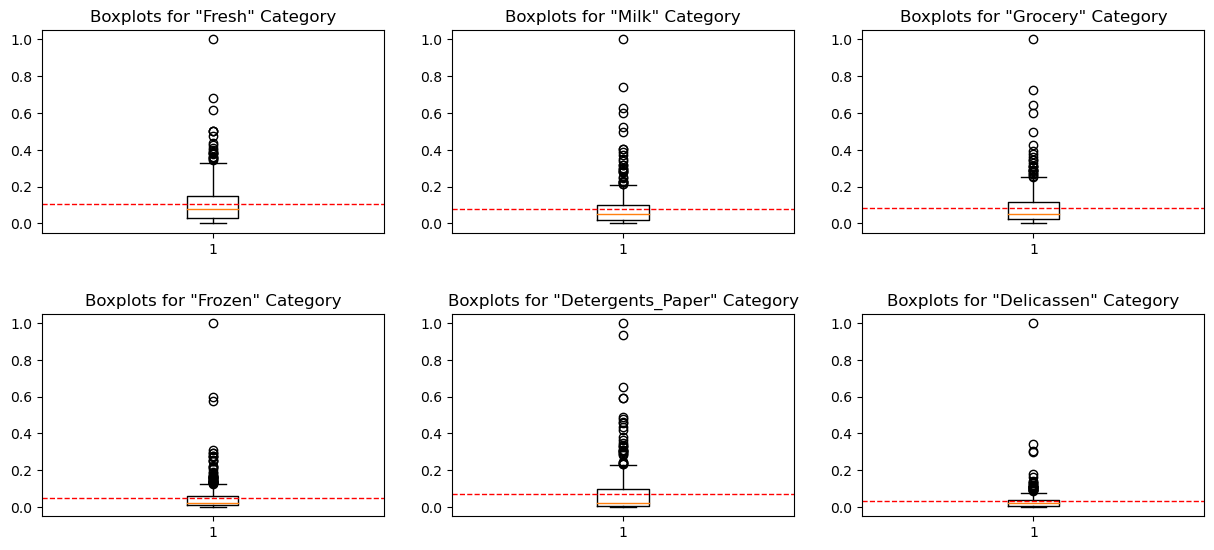



Boxplot of all dataset after removing the outliers


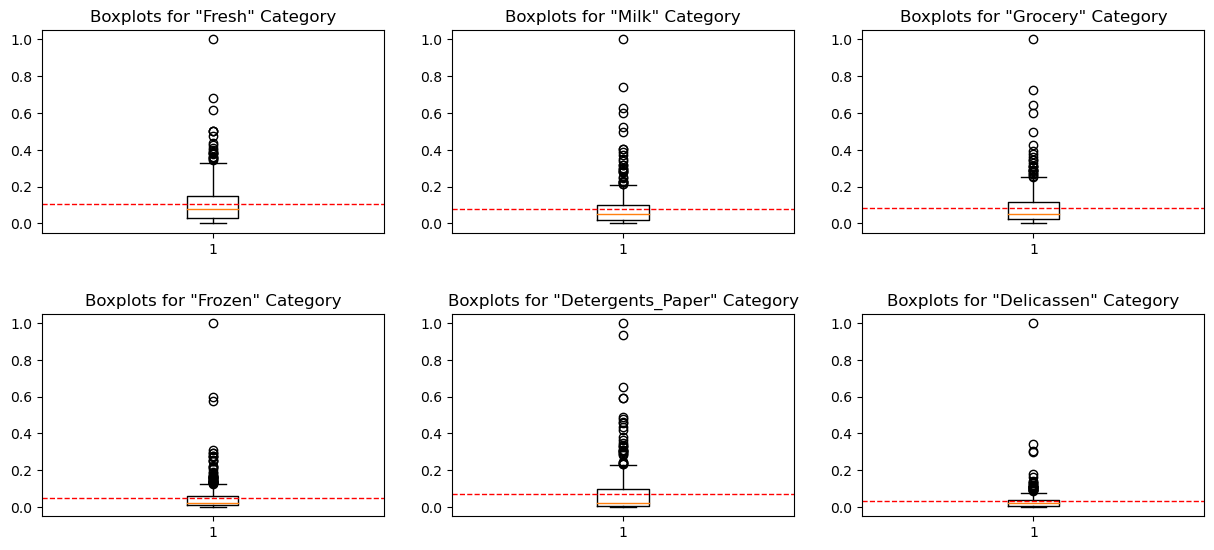

In [117]:
print("Boxplot of all dataset berfore removing the outliers")
make_boxplot(df)
whitespace()
print("Boxplot of all dataset after removing the outliers")
make_boxplot(df)


#### 1.5 Data Cleaning Summary
1. By removing the first set of data values that exceeds or below the threshold set where z=2, the shape of the new datset have slightly improved but are overall the same shape as the original data distribution shape. Which is skewed to the right.
2. After removing the values that have a z-score  less or greater than the 2, the resulting dataset had a more outlier to normal values ratio compared to the original dataset.
3. There is also no significance visual evidence of improvement based on the boxplots of both dataset.The mean line are still above the 50%th percentile.

## 1.6 Data Transformation

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 1.6.1 Standard Scaling

In [119]:
#Datasets for scaling
ss_df = df.copy() #raw dataset
ss_df_ = df_.copy() #cleaned dataset

#Initializing standard scaler
ss_scaler = StandardScaler()


#STANDARD SCALED DATASETS
#standard scaled raw dataset
ss_df = pd.DataFrame(ss_scaler.fit_transform(ss_df), columns=df.columns) 

#standard scaled cleaned dataset
ss_df_ = pd.DataFrame(ss_scaler.fit_transform(ss_df_), columns=df_.columns) 

### 1.6.2 Min-Max Scaling

In [120]:
#Datasets for scaling
mm_df = df.copy() #raw dataset
mm_df_ = df_.copy() #cleaned dataset

#Initializing min-max scaler
mm_scaler = MinMaxScaler()


#MIN-MAX SCALED DATASETS
#Min-Max scaled raw dataset
mm_df = pd.DataFrame(mm_scaler.fit_transform(mm_df))

#Min-Max scaled cleaned dataset
mm_df_ = pd.DataFrame(mm_scaler.fit_transform(mm_df_))

### 1.6.3 Log Transformation

In [121]:
#Datasets for scaling
lt_df = df.copy() #raw dataset
lt_df_ = df_.copy() #cleaned dataset


#LOG TRANSFORMED DATASETS
#Log Transformed raw dataset
lt_df = np.log(lt_df)

#Log Transformed cleaned dataset
lt_df_ = np.log(lt_df_)

### 1.6.4 Visualizing Scaled/Transformed Data

### 1.6.4a Non Scaled, Non-Cleaned Dataset Distribution Compared to Scaled Datasets Distribution

Distribution of Non-Cleaned, Non-Scaled Dataset


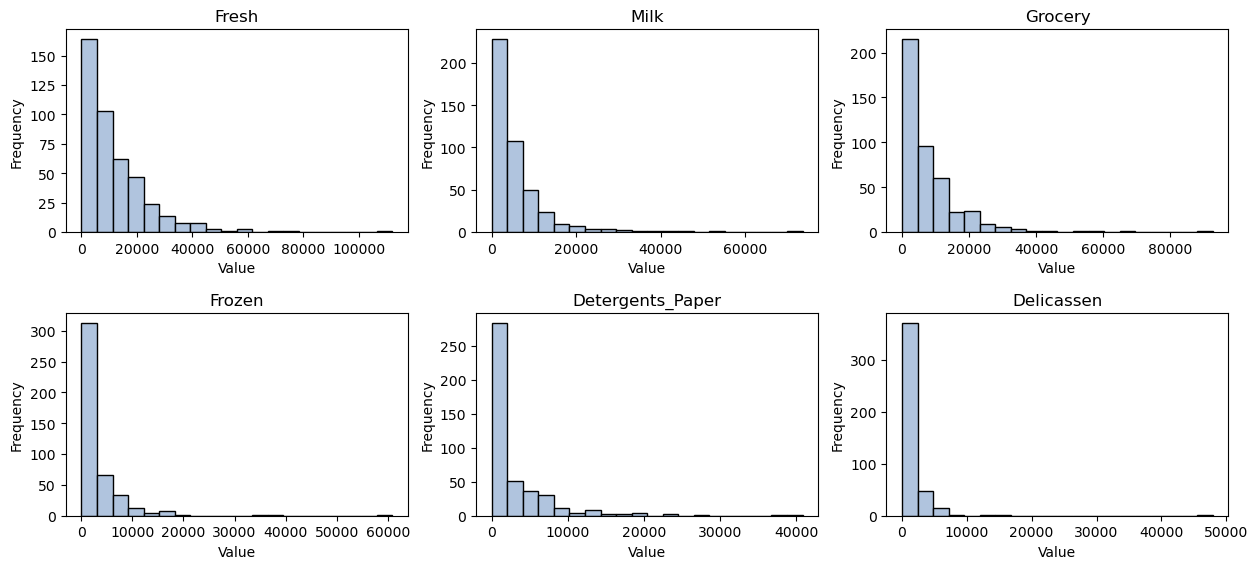



Distribution of Non-Cleaned, Standard Scaled Dataset


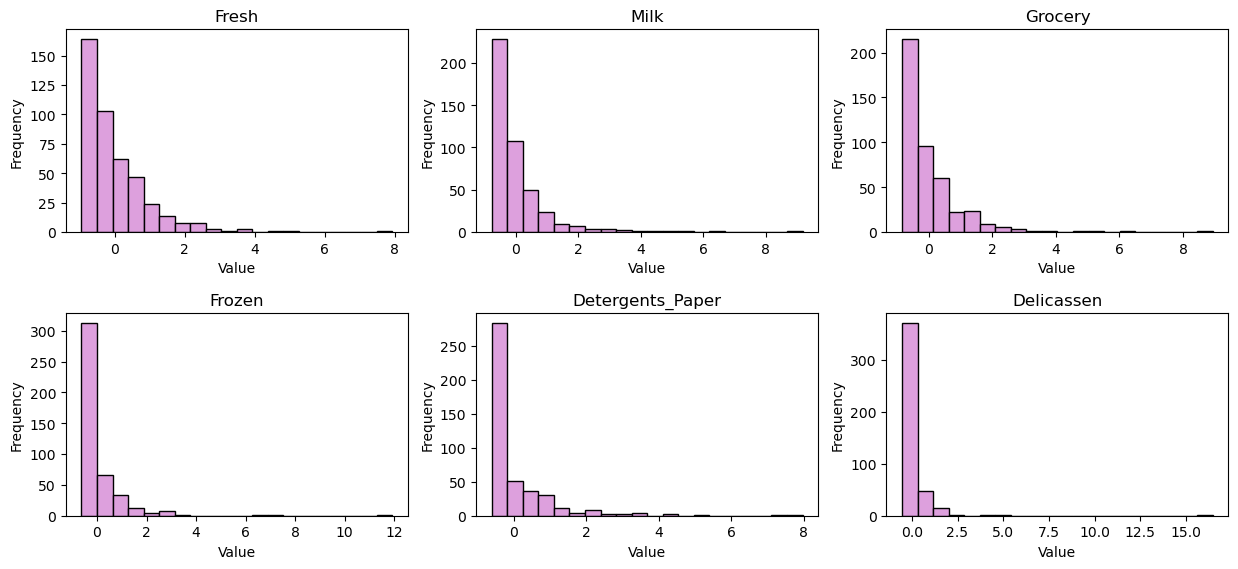



Distribution of Non-Cleaned, Min-Max Scaled Dataset


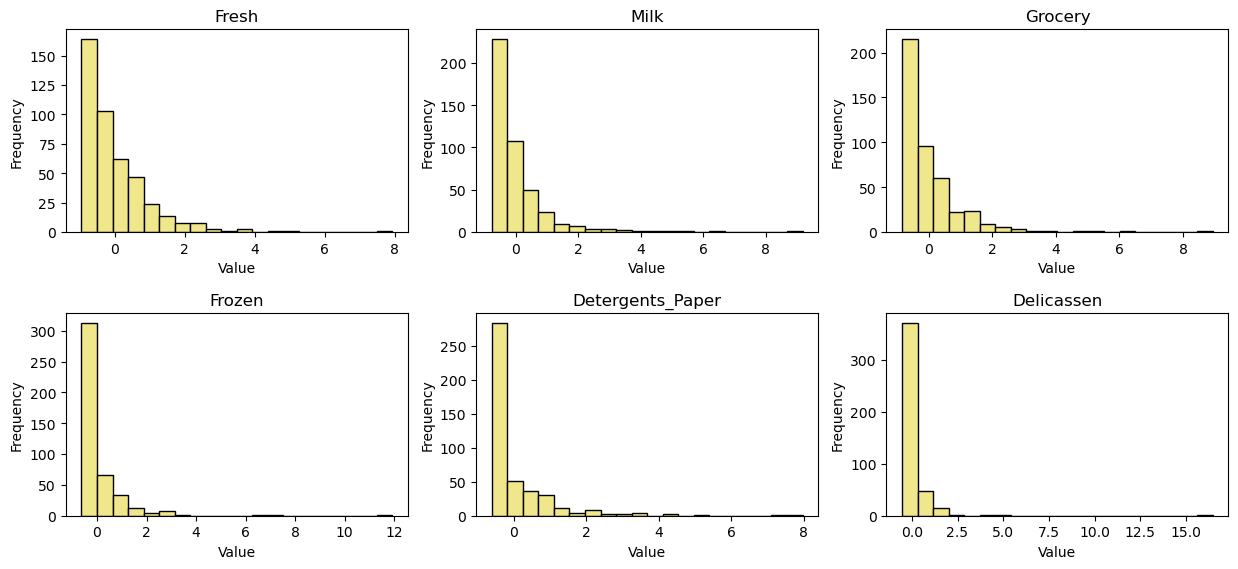



Distribution of Non-Cleaned, Log-Transformed Dataset


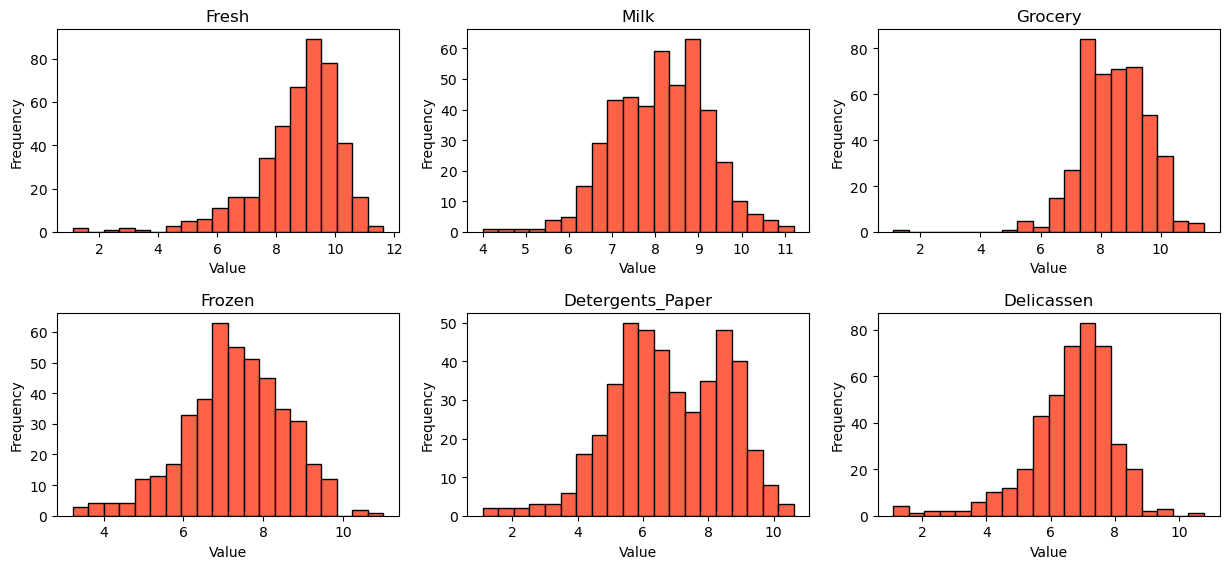

In [122]:
print("Distribution of Non-Cleaned, Non-Scaled Dataset")
make_hist(df)

whitespace()

print("Distribution of Non-Cleaned, Standard Scaled Dataset")
make_hist(ss_df, colour="plum")

whitespace()

print("Distribution of Non-Cleaned, Min-Max Scaled Dataset")
make_hist(ss_df, colour="khaki")

whitespace()

print("Distribution of Non-Cleaned, Log-Transformed Dataset")
make_hist(lt_df, colour="tomato")

whitespace()

### 1.6.4b Cleaned Dataset Distribution Compared to Scaled Datasets Distribution

Distribution of Cleaned, Non-Scaled Dataset


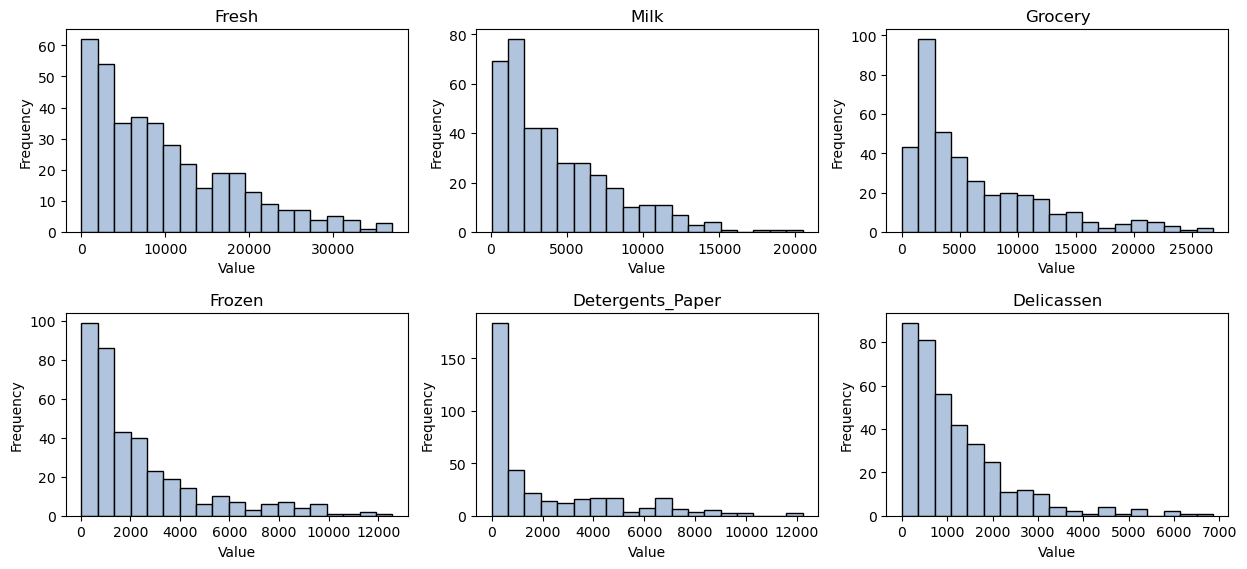



Distribution of Cleaned, Standard Scaled Dataset


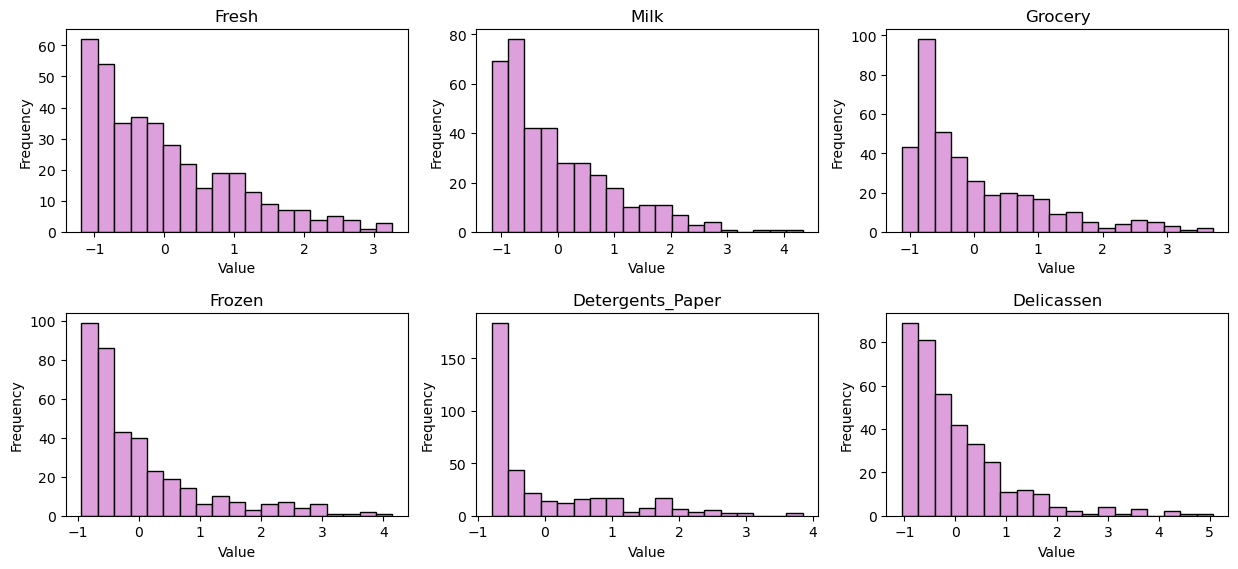



Distribution of Cleaned, Min-Max Scaled Dataset


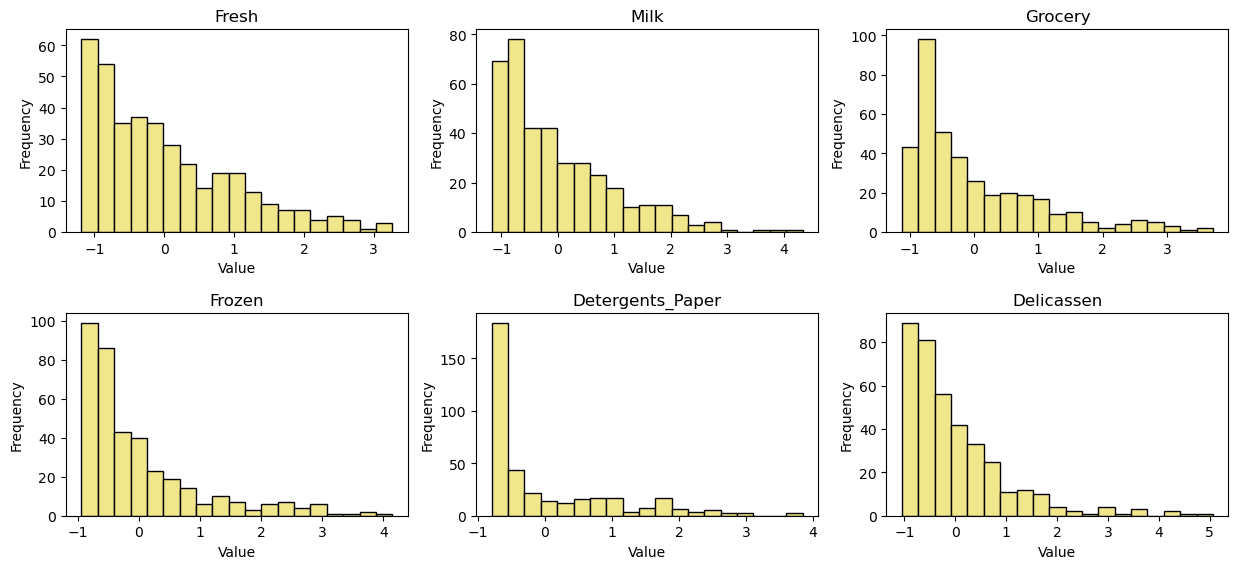



Distribution of Cleaned, Log-Transformed Dataset


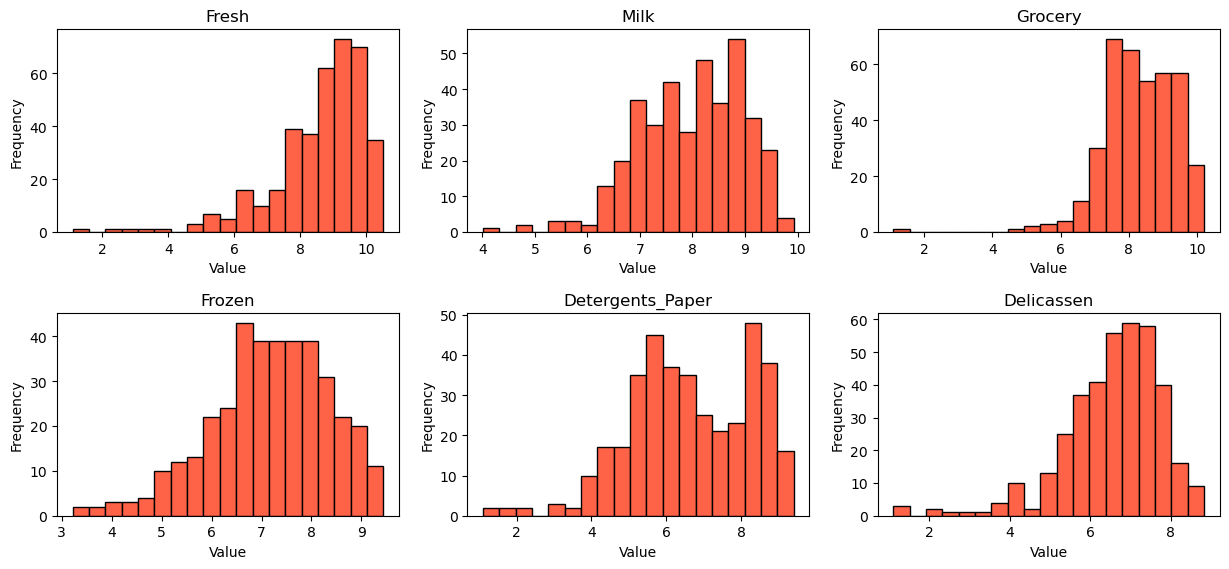

In [123]:
print("Distribution of Cleaned, Non-Scaled Dataset")
make_hist(df_)

whitespace()

print("Distribution of Cleaned, Standard Scaled Dataset")
make_hist(ss_df_, colour="plum")

whitespace()

print("Distribution of Cleaned, Min-Max Scaled Dataset")
make_hist(ss_df_, colour="khaki")

whitespace()

print("Distribution of Cleaned, Log-Transformed Dataset")
make_hist(lt_df_, colour="tomato")

whitespace()

### 1.6.4c Log-Transformed  Non-Cleaned and Cleaned Dataset Distribution  Comparison

Distribution of Non-Cleaned, Log-Transformed Dataset


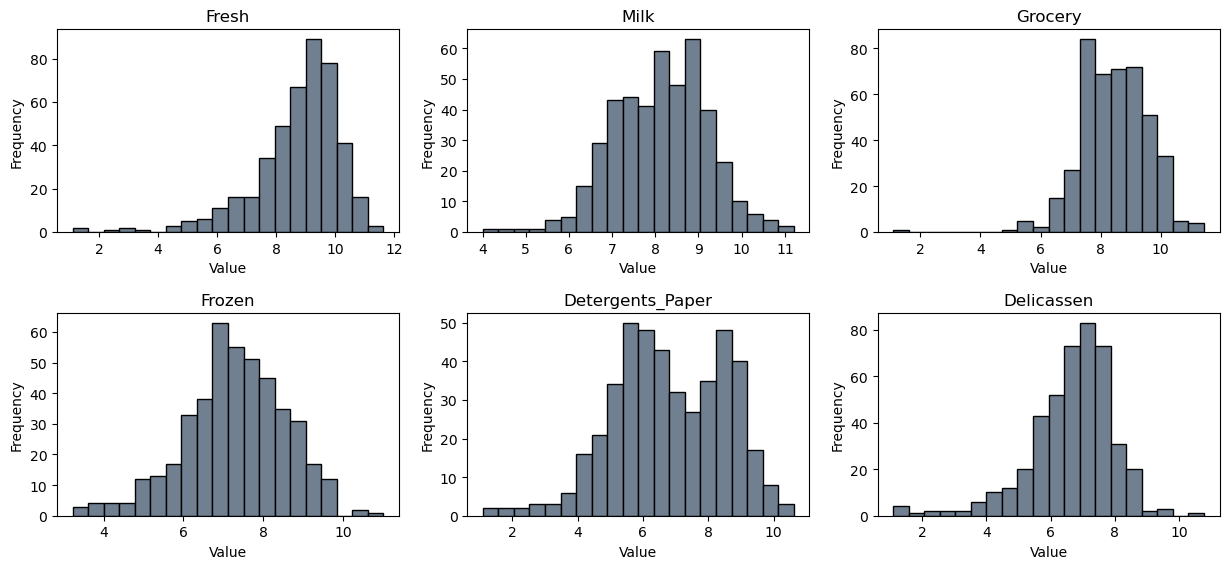



Distribution of Cleaned, Log-Transformed Dataset


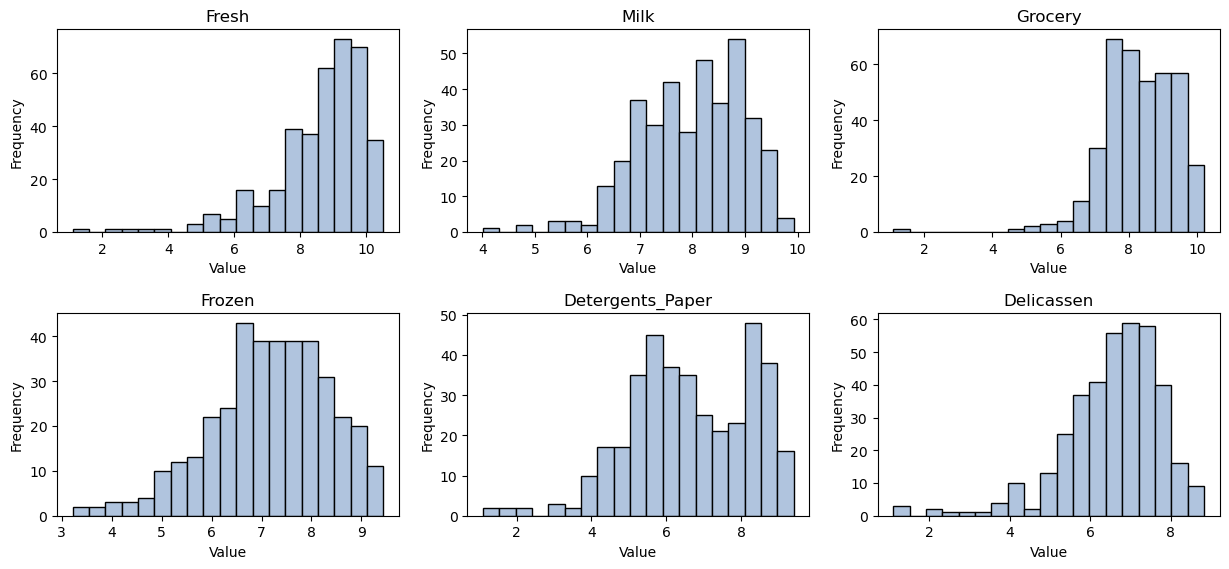

In [124]:
print("Distribution of Non-Cleaned, Log-Transformed Dataset")
make_hist(lt_df, colour="slategrey")

whitespace()

print("Distribution of Cleaned, Log-Transformed Dataset")
make_hist(lt_df_)

whitespace()

### 1.6.d Log-Transformed  Non-Cleaned and Cleaned Dataset Outliers Ratio Comparison

In [125]:
outliers_ll_df = detect_outliers_zscore(lt_df)
outliers_ll_df_ = detect_outliers_zscore(lt_df_)

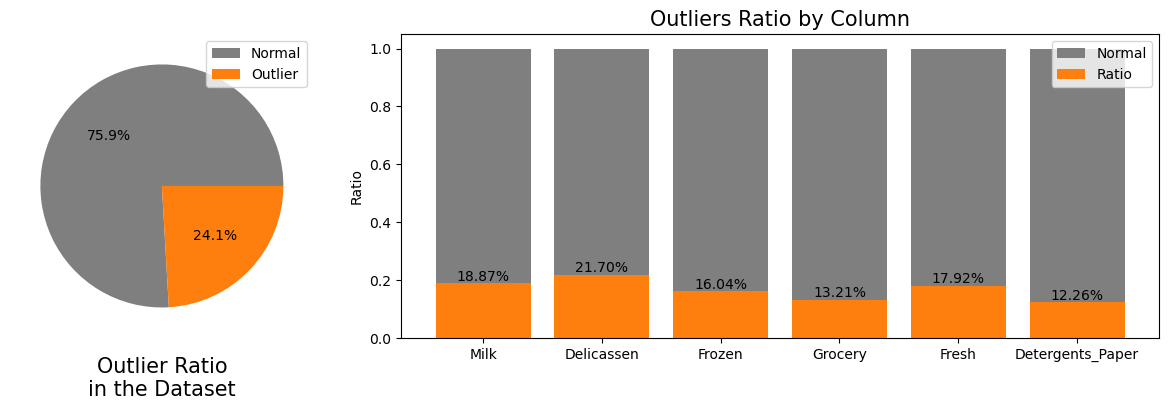

In [126]:
temp = visualize_outliers(outliers_ll_df)

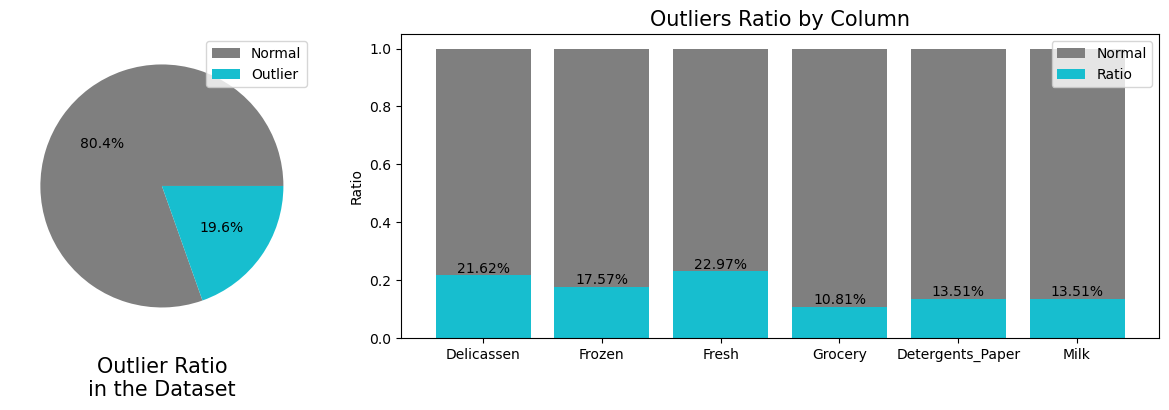

In [127]:
temp = visualize_outliers(outliers_ll_df_, color="cyan")

#### Data Transformation Summary
1. The scaler/transformer which have reduced the skewness of both non-cleaned and clean datasets is the Log Transformation Method.

2. Although the Non-Cleaned dataset have a significantly better/normalized data distribution after the log transformation, the Cleaned dataset have considerably less data values outside the threshold limit of +/- 2 in z-score.

3. Both log-transformed cleaned and non-cleaned dataset will be used for comparison in each clustering method

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

From Trial and error, minmax works best for kmeans

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [129]:
clus_df = lt_df.copy() #log transformed dataset
clus_df_ = lt_df_.copy() #log transformed cleaned dataset
clus_mm_df = mm_df.copy()
clus_mm_df.columns = clus_df.columns

## 2.1 Finding the Optimal Value of K

### 2.1.1 Elbow Method

### 2.1.1a Cleaned Dataset

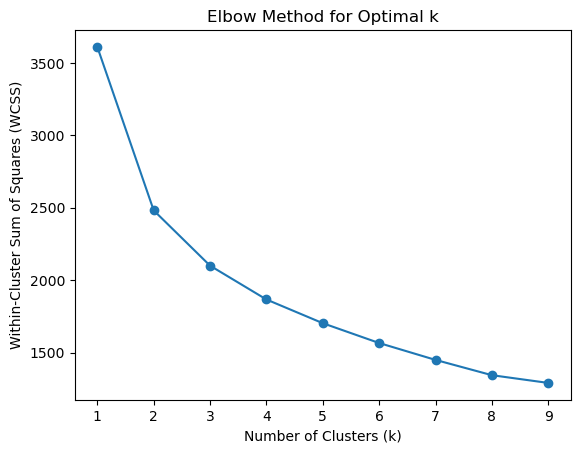

In [130]:
elbow_method(clus_df_)

### 2.1.1b Non-Cleaned Dataset

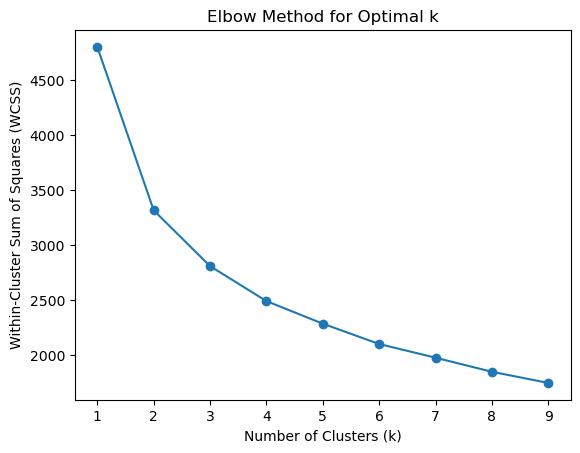

In [131]:
elbow_method(clus_df)

### 2.1.1c MinMax Scaled Dataset

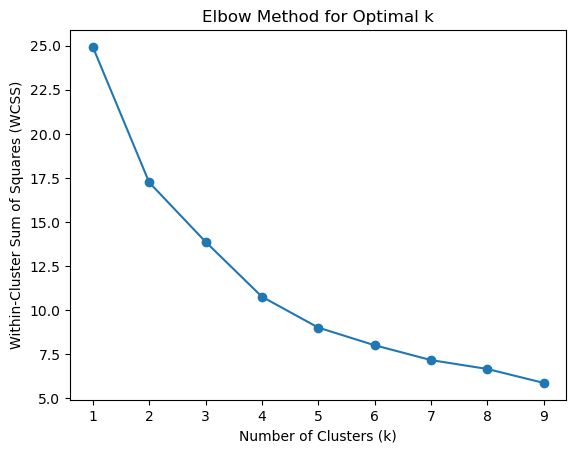

In [132]:
elbow_method(clus_mm_df)

### 2.1.1d Optimal Value of k

Both datasets shows no significant visual difference in terms of WCSS decay

In [133]:
#Non-cleaned dataset k value
elbow_k = 3

#Cleaned dataset k value
elbow_k_ = 3

#MinMax Scaled dataset k value
elbow_mm_k = 3

### 2.1.2 Gap Statistics Method

In [134]:
#Non-cleaned dataset k value
gap_k = gap_statistics(clus_df)

k =  8


In [135]:
#Cleaned dataset k value
gap_k_ = gap_statistics(clus_df_)

k =  8


In [136]:
#MinMax Scaled  dataset k value
gap_mm_k = gap_statistics(clus_mm_df)

k =  9


Using the Gap Statistics Method, the k-value of non-cleaned dataset is 8 while the k value of cleaned dataset is 9.

 ## 2.2 K-means Clustering

### 2.2.1 Initializing the k-means models

In [137]:
#Kmeans nodel initialization for non-cleaned dataset
kmeans_elbow = KMeans(n_clusters=elbow_k)
kmeans_gap = KMeans(n_clusters=gap_k)

In [138]:
#Kmeans nodel initialization cleaned dataset
kmeans_elbow_ = KMeans(n_clusters=elbow_k_)
kmeans_gap_ = KMeans(n_clusters=gap_k_)

In [139]:
#Kmeans nodel initialization minmax scaled dataset
kmeans_mm_elbow = KMeans(n_clusters=elbow_mm_k)
kmeans_mm_gap = KMeans(n_clusters=gap_mm_k)

### 2.2.2 Fitting the datasets to the models

In [140]:
#Kmeans model fitting the non-cleaned dataset
kmeans_elbow.fit(clus_df)
kmeans_gap.fit(clus_df)

KMeans()

In [141]:
#Kmeans model fitting the cleaned dataset
kmeans_elbow_.fit(clus_df_)
kmeans_gap_.fit(clus_df_)

KMeans()

In [142]:
#Kmeans model fitting the minmax scaled dataset
kmeans_mm_elbow.fit(clus_mm_df)
kmeans_mm_gap.fit(clus_mm_df)

KMeans(n_clusters=9)

### 2.2.3 Getting the Clusters Indexes and Centroids

In [143]:
#Cluster Indexes and Centroids using Elbow Method for k-means model fitted with Non-Cleaned Dataset

labels_elbow = kmeans_elbow.labels_
centroids_elbow = kmeans_elbow.cluster_centers_

In [144]:
#Cluster Indexes and Centroids using Gap Statistics Method for k-means model fitted with Non-Cleaned Dataset
labels_gap = kmeans_gap.labels_
centroids_gap = kmeans_gap.cluster_centers_

In [145]:
#Cluster Indexes and Centroids using Elbow Method for k-means model fitted with Cleaned Dataset

labels_elbow_ = kmeans_elbow_.labels_
centroids_elbow_ = kmeans_elbow_.cluster_centers_

In [146]:
#Cluster Indexes and Centroids using Gap Statistics Method for k-means model fitted with Cleaned Dataset

labels_gap_ = kmeans_gap_.labels_
centroids_gap_ = kmeans_gap_.cluster_centers_

In [147]:
#Cluster Indexes and Centroids using Elbow Method for k-means model fitted with minmax scaled Dataset

labels_mm_elbow = kmeans_mm_elbow.labels_
centroids_mm_elbow = kmeans_mm_elbow.cluster_centers_

In [148]:
#Cluster Indexes and Centroids using Gap Statistics Method for k-means model fitted minmax scaled Dataset
labels_mm_gap = kmeans_mm_gap.labels_
centroids_mm_gap = kmeans_mm_gap.cluster_centers_

## 2.3 Assigning the Clusters to the Corresponding Dataset Rows 

In [149]:
kclus_df = clus_df.copy() #K-means clusters dataset for non-cleaned dataset 
kclus_df_ = clus_df_.copy() #K-means clusters dataset for cleaned dataset
kclus_mm_df = clus_mm_df.copy() #K-means clusters dataset for minmax dataset 

In [150]:
#Non-Cleaned Dataset with clusters from k-means

kclus_df["kcluster_elbow"] = labels_elbow #clusters by elbow method
kclus_df["kcluster_gap"]= labels_gap #clusters by gap statistics method

In [151]:
#Cleaned Scaled Dataset with clusters from k-means

kclus_df_["kcluster_elbow"] = labels_elbow_ #clusters by elbow method
kclus_df_["kcluster_gap"]= labels_gap_ #clusters by gap statistics method

In [152]:
#Minmax Scaled Dataset with clusters from k-means

kclus_mm_df["kcluster_elbow"] = labels_mm_elbow #clusters by elbow method
kclus_mm_df["kcluster_gap"]= labels_mm_gap #clusters by gap statistics method

## 2.4 K-Means Metrics - Silhoutte Score

In [153]:
kcluster_columns = ["kcluster_elbow","kcluster_gap"]

In [244]:
#Silhouette Score for Elbow Method
temp_df = kclus_df.copy()
temp_df = temp_df.drop(columns=kcluster_columns)

s_score_elbow = silhouette_score(temp_df, labels_elbow)

print("Log Transformed Non-Cleaned Dataset")
print("Elbow Method k = ", elbow_k)
print("silhouette score: " ,s_score_elbow)
whitespace()

#Silhouette Score for Elbow Method
temp_df = kclus_df.copy()
temp_df = temp_df.drop(columns=kcluster_columns)

s_score_gap = silhouette_score(temp_df, labels_gap)

print("Log Transformed Non-Cleaned Dataset")
print("Elbow Method k = ", gap_k)
print("silhouette score: " ,s_score_gap)
whitespace()

#Silhouette Score for Elbow Method
temp_df_ = kclus_df_.copy()
temp_df_ = temp_df_.drop(columns=kcluster_columns)

s_score_elbow_ = silhouette_score(temp_df_, labels_elbow_)

print("Log Transformed Cleaned Dataset")
print("Elbow Method k = ", elbow_k_)
print("silhouette score: " ,s_score_elbow_)
whitespace()

#Silhouette Score for Elbow Method
temp_df_ = kclus_df_.copy()
temp_df_ = temp_df_.drop(columns=kcluster_columns)

s_score_gap = silhouette_score(temp_df_, labels_gap_)

print("Log Transformed Cleaned Dataset")
print("Elbow Method k = ", gap_k)
print("silhouette score: " ,s_score_gap)
whitespace()

#Silhouette Score for Elbow Method
temp_mm_df = kclus_mm_df.copy()
temp_mm_df = temp_mm_df.drop(columns=kcluster_columns)

s_score_mm_elbow = silhouette_score(temp_mm_df, labels_mm_elbow)

print("MinMax Scaled Non-Cleaned Dataset")
print("Elbow Method k = ", elbow_mm_k)
print("silhouette score: " ,s_score_mm_elbow)
whitespace()

#Silhouette Score for Elbow Method
temp_mm_df = kclus_mm_df.copy()
temp_mm_df = temp_mm_df.drop(columns=kcluster_columns)

s_score_mm_gap = silhouette_score(temp_mm_df, labels_mm_gap)

print("MinMax Scaled Cleaned Dataset")
print("Elbow Method k = ", gap_mm_k)
print("silhouette score: " ,s_score_mm_gap)
whitespace()

Log Transformed Non-Cleaned Dataset
Elbow Method k =  3
silhouette score:  0.25792641172619224


Log Transformed Non-Cleaned Dataset
Elbow Method k =  8
silhouette score:  0.1868912911299842


Log Transformed Cleaned Dataset
Elbow Method k =  3
silhouette score:  0.2576761784766751


Log Transformed Cleaned Dataset
Elbow Method k =  8
silhouette score:  0.19957870806581476


MinMax Scaled Non-Cleaned Dataset
Elbow Method k =  3
silhouette score:  0.43975555829118596


MinMax Scaled Cleaned Dataset
Elbow Method k =  9
silhouette score:  0.3293348244485174




The model which have the highest silhoutte score is the model that used MinMax scaled non-cleaned dataset

## 2.5 Interpreting the K-means Clustered Dataset

 #### Summary

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [219]:
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

In [220]:
aglo_ss_df = ss_df.copy() #Standard Scaled Non-cleaned dataset
aglo_ss_df_ = ss_df_.copy() #Standard Scaled Cleaned dataset
aglo_mm_df = mm_df.copy() #Minmax Non-cleaned dataset
aglo_mm_df_ = mm_df_.copy() #Minmax Scaled Cleaned dataset
aglo_lt_df = lt_df.copy() #LogTransformed Non-cleaned dataset
aglo_lt_df_ = lt_df_.copy() #MLogTransformed Cleaned dataset

## 3.1 Determining the number of branches

### 3.1a Standard Scaled Non-cleaned Dataset Branches = 3

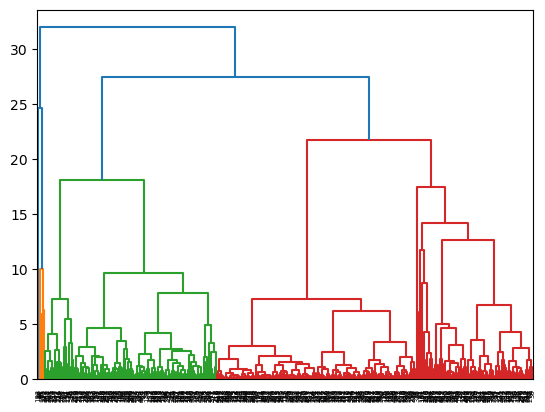

In [221]:
visualize_dendrogram(dendogram_model(aglo_ss_df))

### 3.1b Standard Scaled Cleaned Dataset Branches = 2

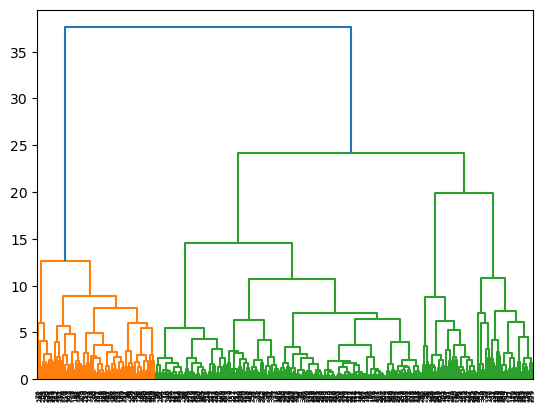

In [223]:
visualize_dendrogram(dendogram_model(aglo_ss_df_))

### 3.1c Minmax Scaled Non-Cleaned Dataset Branches = 3

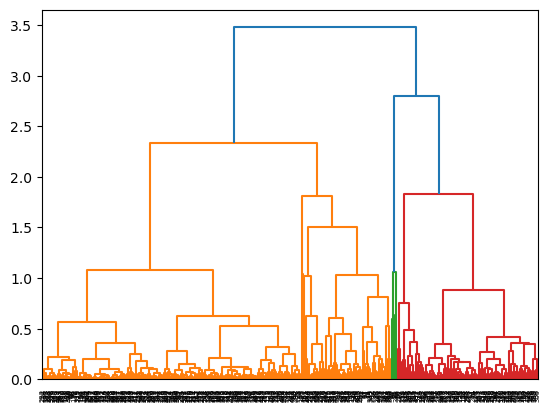

In [224]:
visualize_dendrogram(dendogram_model(aglo_mm_df))

### 3.1d Minmax Scaled Cleaned Dataset Branches = 2

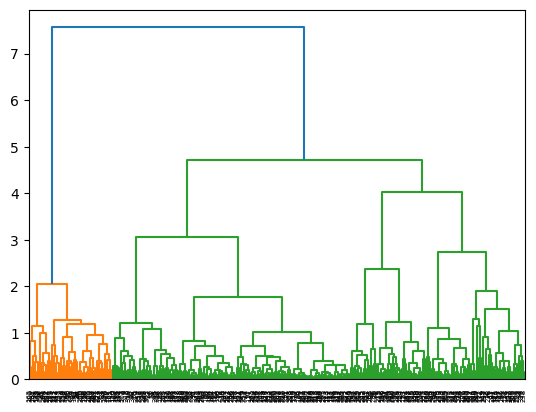

In [225]:
visualize_dendrogram(dendogram_model(aglo_mm_df_))

### 3.1e Log Transformed Non-Cleaned Dataset Branches = 2

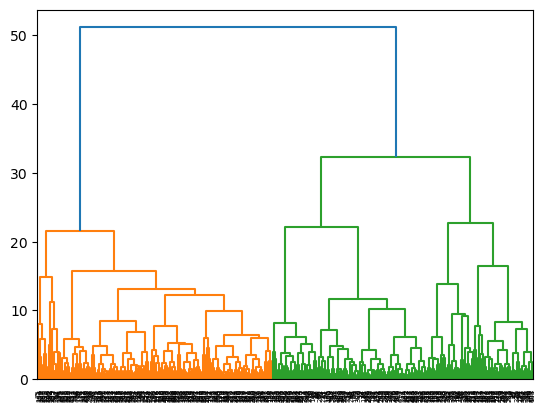

In [226]:
visualize_dendrogram(dendogram_model(aglo_lt_df))

### 3.1f Log Transformed Non-Cleaned Dataset Branches = 2

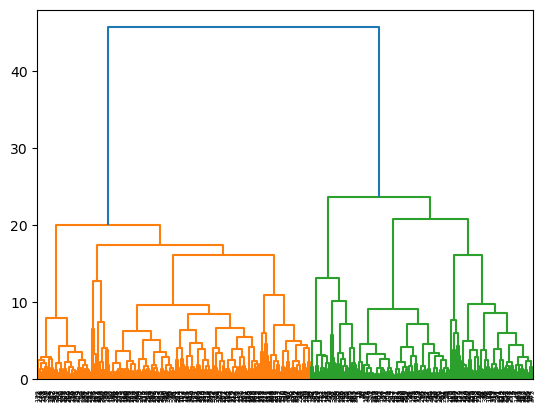

In [227]:
visualize_dendrogram(dendogram_model(aglo_lt_df_))

1. For the non-cleaned standardized and minmax scaled datasets, the number of branches is three while the rest have branches that is equal to two.

## 3.2 Agllomerative Clustering

### 3.2.1 Agllomerative Clustering Models for each Datasets

In [228]:
#Standard scaled dataset models
agglo_ss_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
agglo_ss_cluster_ = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [229]:
#MinMax Scaled Models
agglo_mm_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
agglo_mm_cluster_ = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [230]:
#Log Transformed Models
agglo_lt_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
agglo_lt_cluster_ = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

### 3.2.2 Fitting Datasets to the Models

In [231]:
#Fitting Stndard Scaled Datasets to the Model
labels_ss_cluster = agglo_ss_cluster.fit_predict(aglo_ss_df)
labels_ss_cluster_ = agglo_ss_cluster_.fit_predict(aglo_ss_df_)

In [232]:
#Fitting MinMax Scaled Datasets to the Model
labels_mm_cluster = agglo_mm_cluster.fit_predict(aglo_mm_df)
labels_mm_cluster_ = agglo_mm_cluster_.fit_predict(aglo_mm_df_)

In [233]:
#Fitting Log Transformed Datasets to the Model
labels_lt_cluster = agglo_ss_cluster.fit_predict(aglo_lt_df)
labels_lt_cluster_ = agglo_ss_cluster_.fit_predict(aglo_lt_df_)

## 3.3 Assigning the Clusters to the Datasets

In [234]:
#Standard Scaled Datasets
aglo_ss_df["Cluster"] = labels_ss_cluster
aglo_ss_df_["Cluster"] = labels_ss_cluster_

In [235]:
#Minmax Scaled Datasets
aglo_mm_df["Cluster"] = labels_mm_cluster
aglo_mm_df_["Cluster"] = labels_mm_cluster_

In [236]:
#Log Transformed Scaled Datasets
aglo_lt_df["Cluster"] = labels_lt_cluster
aglo_lt_df_["Cluster"] = labels_lt_cluster_

## 3.4 Agglomerative Clustering Metrics - Silhouette Score

In [245]:
temp_df_ = aglo_ss_df.copy()
temp_df_ = aglo_ss_df.drop("Cluster", axis=1)

x = silhouette_score(temp_df_, labels_ss_cluster)

print("Standard Scaled Non-Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

temp_df_ = aglo_ss_df_.copy()
temp_df_ = aglo_ss_df_.drop("Cluster", axis=1)

x = silhouette_score(temp_df_, labels_ss_cluster_)

print("Standard Scaled Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

temp_df_ = aglo_mm_df.copy()
temp_df_ = aglo_mm_df.drop("Cluster", axis=1)

x = silhouette_score(temp_df_, labels_mm_cluster)

print("MinMax Scaled Non-Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

temp_df_ = aglo_mm_df_.copy()
temp_df_ = aglo_mm_df_.drop("Cluster", axis=1)

x = silhouette_score(temp_df_, labels_mm_cluster_)

print("MinMax Scaled Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

temp_df_ = aglo_lt_df.copy()
temp_df_ = aglo_lt_df.drop("Cluster", axis=1)

x = silhouette_score(temp_df_, labels_lt_cluster)

print("Log Transformed Non-Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

temp_df_ = aglo_lt_df_.copy()
temp_df_ = aglo_lt_df_.drop("Cluster", axis=1)

x = silhouette_score(temp_df_, labels_lt_cluster_)

print("Log Transformed Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

Standard Scaled Non-Cleaned Dataset
silhouette score:  0.7675801420229833


Standard Scaled Cleaned Dataset
silhouette score:  0.5489733225689744


MinMax Scaled Non-Cleaned Dataset
silhouette score:  0.747367063209434


MinMax Scaled Cleaned Dataset
silhouette score:  0.5230723238763341


Log Transformed Non-Cleaned Dataset
silhouette score:  0.5320028725487381


Log Transformed Cleaned Dataset
silhouette score:  0.5628242895149229




The model that produced the highest silhoutte score is the Min Max scaled non-cleaned dataset

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [246]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [247]:
pca_ss_df = normalize(ss_df.copy()) #Standard Scaled Non-cleaned dataset
pca_ss_df_ = normalize(ss_df_.copy()) #Standard Scaled Cleaned dataset
pca_mm_df = normalize(mm_df.copy()) #Minmax Non-cleaned dataset
pca_mm_df_ = normalize(mm_df_.copy()) #Minmax Scaled Cleaned dataset
pca_lt_df = normalize(lt_df.copy()) #LogTransformed Non-cleaned dataset
pca_lt_df_ = normalize(lt_df_.copy()) #MLogTransformed Cleaned dataset

In [252]:
pca = PCA(n_components=2)

In [253]:
reduced_pca_ss_df = pca.fit_transform(pca_ss_df)
reduced_pca_ss_df_ = pca.fit_transform(pca_ss_df_)
reduced_pca_mm_df = pca.fit_transform(pca_mm_df)
reduced_pca_mm_df_ = pca.fit_transform(pca_mm_df_)
reduced_pca_lt_df = pca.fit_transform(pca_lt_df)
reduced_pca_lt_df_ = pca.fit_transform(pca_lt_df_)

In [254]:
reduced_pca_ss_df = pd.DataFrame(reduced_pca_ss_df)
reduced_pca_ss_df_ = pd.DataFrame(reduced_pca_ss_df_)
reduced_pca_mm_df = pd.DataFrame(reduced_pca_mm_df)
reduced_pca_mm_df_ = pd.DataFrame(reduced_pca_mm_df_)
reduced_pca_lt_df = pd.DataFrame(reduced_pca_lt_df)
reduced_pca_lt_df_ = pd.DataFrame(reduced_pca_lt_df_)

In [255]:
reduced_pca_ss_df.columns = ['P1', 'P2']
reduced_pca_ss_df_.columns = ['P1', 'P2']
reduced_pca_mm_df.columns = ['P1', 'P2']
reduced_pca_mm_df_.columns = ['P1', 'P2']
reduced_pca_lt_df.columns = ['P1', 'P2']
reduced_pca_lt_df_.columns = ['P1', 'P2']

## Kmeans

In [256]:
gap_statistics(reduced_pca_mm_df)

k =  7


7

In [257]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_pca_mm_df)

klabels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca_df = reduced_pca_mm_df.copy()  
pca_df["K-Cluster"]= klabels 

In [258]:
temp_df_ = pca_df.copy()
temp_df_ = pca_df.drop("K-Cluster", axis=1)

x = silhouette_score(temp_df_, klabels)

print("MinMax Scaled Non-Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

MinMax Scaled Non-Cleaned Dataset
silhouette score:  0.556409026961438




## Agglomerative Clustering

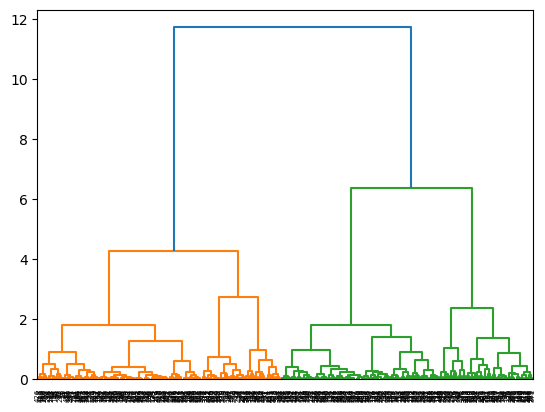

In [259]:
visualize_dendrogram(dendogram_model(reduced_pca_mm_df))

In [260]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [261]:
aclabels = ac.fit_predict(reduced_pca_mm_df)
pca_df["AC-Cluster"]= aclabels 

In [262]:
temp_df_ = pca_df.copy()
temp_df_ = pca_df.drop(["AC-Cluster", "K-Cluster"], axis=1)

x = silhouette_score(temp_df_, aclabels)

print("MinMax Scaled Non-Cleaned Dataset")
print("silhouette score: " ,x)
whitespace()

MinMax Scaled Non-Cleaned Dataset
silhouette score:  0.5319506824229724




## PCA Clusters by Kmeans

In [263]:
pca_df = raw_df.copy()
pca_df["K-Cluster"] = klabels

## Clusters

In [264]:
df_k1 = pca_df[pca_df["K-Cluster"] == 0].copy()
df_k2 = pca_df[pca_df["K-Cluster"] == 1].copy()
df_k3 = pca_df[pca_df["K-Cluster"] == 2].copy()

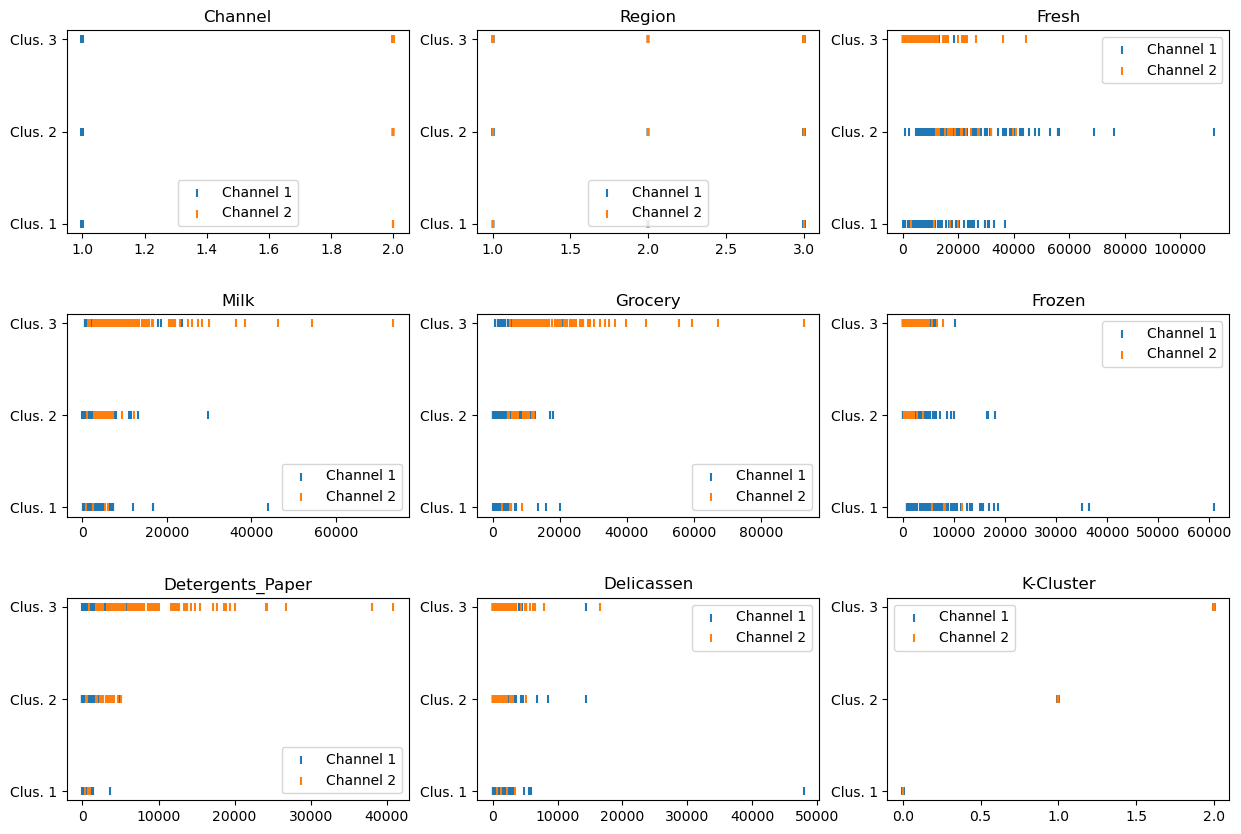

In [453]:
clusters_channel(pca_df)

1. For the three clusters, it is visually notable that cluster 3 are data which mostly belongs to Channel 2.
2. Cluster 1 are data which are primarily on Channel 1 while Cluster 2 are combination of Channels 1 and 2.

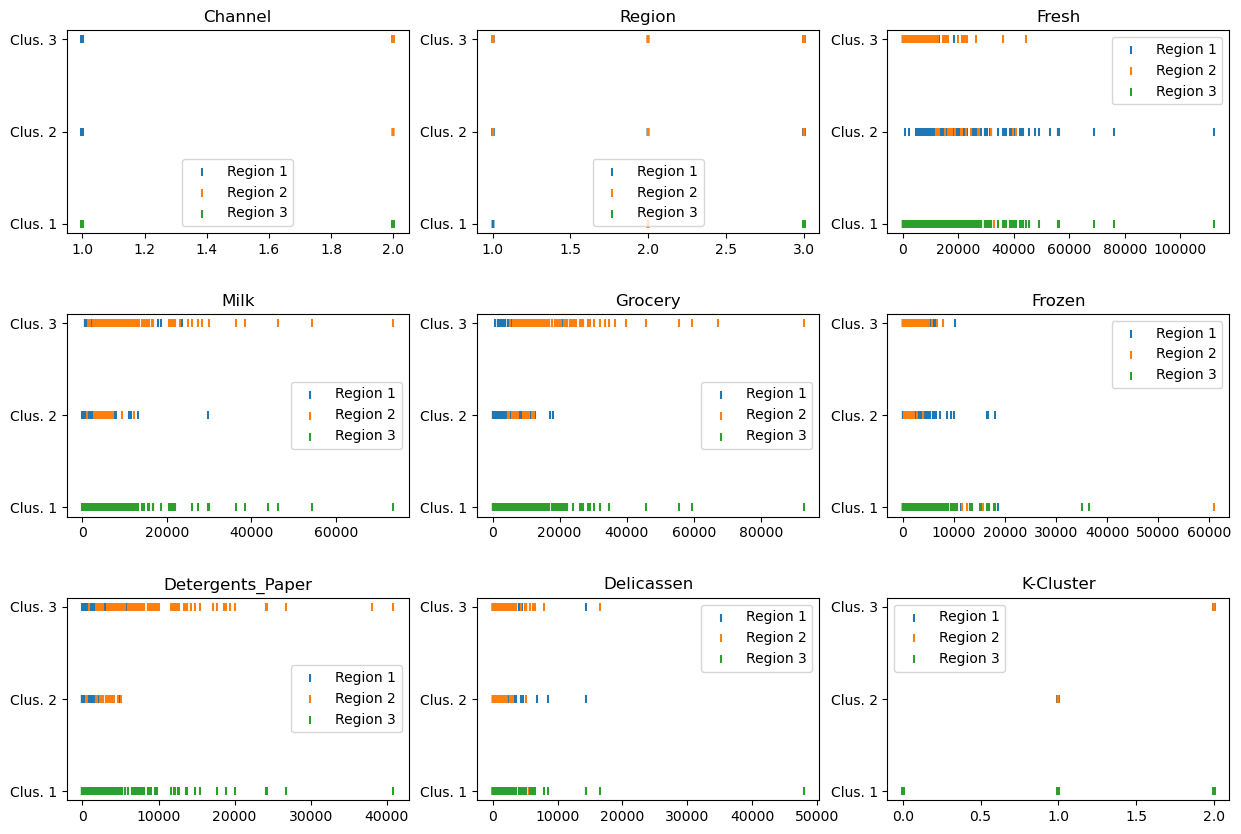

In [454]:
clusters_region(pca_df)

1. In General, Cluster 1 are data which belongs to Region 3, Clusters 2 are primarily on Region 1 and Cluster 3 are mostly on Region 2.

#### PCA Summary:
1. Cluster 1 are wholesale goods which are primarily sold in Region 3 and through Channel 1.
2. Cluster 2 are wholesale goods which are sold in both Region 1 and 2 through Channels 1 and 2.
3. Cluster 3 are wholesale goods which are primarily sold in Region 2 and through Channel 2.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. More than two-thirds of the wholesale good sold came from Region 3. Therefore, Regions 1 and 2 can benefit from more marketing techniques or facility renovation and other investments to boost the sales.

2. Two-thirds of the wholesale goods sold was through Channel 2. However, Channel 1 is mostly prevelant in all Regions. Therefor, it can be beneficial to swtich the sales method from Channel 1 to Channel 2 to improve the sales.

3. Based on the PCA results, Cluster 3 have a higher range of wholesale goods in Milk, Grocery and Detergent products. We can imply that grocers in this region have a higher number of family size with an infant who consumes milk product who can benefit from family-centric/bigger servings/quantity products.

4. Based on the PCA results, Cluster 2 grocers have higher range of wholesale goods in Fresh category, therefore we can imply that cluster 2 grocers are health concious consumers who can benefit from health related promotions.

5. Based on the PCA results, Cluster 2 grocers have higher range of wholesale goods in Frozen goods which are likely individuals who are single, have a busy schedule or does not know how to cook. This grocers can benefit from products that are easy to make or ready made like meal kits or cooked food.

## Functions

In [193]:
def sumstat_highest_mean(*args, group_names):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
        
    mean_groupname = []
    mean_category = []
    mean_value = []
    mean_name = []
    
    
#     for i in range(len(args[0])):
#         mean_value.append(args[0].loc["mean"][i])
#         mean_category.append(args[0].loc["mean"].index[i])
#         mean_groupname.append(group_names[0])
    
    for i in range(len(args)):
        temp_group = []
        temp_mean = []
        temp_category = []
        
        for j in range(len(args[i])):
            temp_group.append(group_names[i])
            temp_mean.append(args[i].loc["mean"][j])
            temp_category.append(args[i].loc["mean"].index[j])
        
        for k in range(len(mean_value)):
            if (temp_mean[k] >= mean_value[k]):
                mean_value[k] = temp_mean[k]
                mean_name.append(temp_group[k] + "_" + temp_category[k])
    
    return mean_name,temp_mean

In [194]:
def sumstat_lister(*args, instruct = True):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    #Instructions
    message = """
        1. Set instruct = false in the parameters to turn off this message.
        2. Sumstat_lister returns a dictionary with keys that corresponds to each summary statistics element.
        3. The dictionary keys are as follow:
            s_min = summary stat minimum
            s_max = summary stat maximum
            s_mean = summary stat mean
            s_std = summary stat standard deviation
            s_25 = summary stat 25% of the data
            s_50 = summary stat 50% of the data
            s_75 = summary stat 75% of the data
            s_count = sumstat_count,
    """
    if (instruct): print(message)
    
    #Summary Stat Variables
    sumstat_min = []
    sumstat_max = []
    sumstat_mean = []
    sumstat_stdev = []
    sumstat_25 = []
    sumstat_50 = []
    sumstat_75 = []
    sumstat_count = []
    sumstat_categories = []
    
    
    #Appending values to the variables
    for dataframe in range(len(args)):
        df = pd.DataFrame(args[dataframe])
        sumstat_categories.append(list(df.columns))
        
        for categories in range(len(args[dataframe])):
            sumstat_min.append(df.iloc[:,categories].loc["min"])
            sumstat_max.append(df.iloc[:,categories].loc["max"])
            
            sumstat_mean.append(df.iloc[:,categories].loc["mean"])
            sumstat_stdev.append(df.iloc[:,categories].loc["std"])
            
            sumstat_25.append(df.iloc[:,categories].loc["25%"])
            sumstat_50.append(df.iloc[:,categories].loc["50%"])
            sumstat_75.append(df.iloc[:,categories].loc["75%"])
            
            sumstat_count.append(df.iloc[:,categories].loc["count"])
    
    #itemized categories
    temp = []
    for group in sumstat_categories:
        for category in group:
            temp.append(category)
            
    sumstat_categories = temp
    
    #Summary Statistics Dictionary
    sumstat_dict = dict(
        s_min = sumstat_min,
        s_max = sumstat_max,
        s_mean = sumstat_mean,
        s_std = sumstat_stdev,
        s_25 = sumstat_25,
        s_50 = sumstat_50,
        s_75 = sumstat_75,
        s_count = sumstat_count,
        s_categories = sumstat_categories
    )

    return sumstat_dict

In [195]:
def get_zeros(df):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    df = pd.DataFrame(df)
    
    columns = df.columns
    col_name = []
    zero_count = [0 for col in range(len(columns))]
    
    for i in range(len(columns)):
        col_name.append(columns[i])
        for j in range(len(df[columns[i]])):
            if ((df[columns[i]][j]) == 0):
                zero_count[i]+= 1
        
        print(col_name[i], "Zero Values: ", zero_count[i])

In [196]:
def sumstat_lister(*args, instruct = True):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    #Instructions
    message = """
        1. Set instruct = false in the parameters to turn off this message.
        2. Sumstat_lister returns a dictionary with keys that corresponds to each summary statistics element.
        3. The dictionary keys are as follow:
            s_min = summary stat minimum
            s_max = summary stat maximum
            s_mean = summary stat mean
            s_std = summary stat standard deviation
            s_25 = summary stat 25% of the data
            s_50 = summary stat 50% of the data
            s_75 = summary stat 75% of the data
            s_count = sumstat_count,
    """
    if (instruct): print(message)
    
    #Summary Stat Variables
    sumstat_min = []
    sumstat_max = []
    sumstat_mean = []
    sumstat_stdev = []
    sumstat_25 = []
    sumstat_50 = []
    sumstat_75 = []
    sumstat_count = []
    sumstat_categories = []
    
    
    #Appending values to the variables
    for dataframe in range(len(args)):
        df = pd.DataFrame(args[dataframe])
        sumstat_categories.append(list(df.columns))
        
        sumstat_min.append(df.loc["min"])
        sumstat_max.append(df.loc["max"])

        sumstat_mean.append(df.loc["mean"])
        sumstat_stdev.append(df.loc["std"])

        sumstat_25.append(df.loc["25%"])
        sumstat_50.append(df.loc["50%"])
        sumstat_75.append(df.loc["75%"])

        sumstat_count.append(df.loc["count"])
                    
    
    #itemized categories
    temp = []
    for group in sumstat_categories:
        for category in group:
            temp.append(category)
            
    sumstat_categories = temp
    
    #Summary Statistics Dictionary
    sumstat_dict = dict(
        s_min = sumstat_min,
        s_max = sumstat_max,
        s_mean = sumstat_mean,
        s_std = sumstat_stdev,
        s_25 = sumstat_25,
        s_50 = sumstat_50,
        s_75 = sumstat_75,
        s_count = sumstat_count,
        s_categories = sumstat_categories
    )

    return sumstat_dict

## Visualization Functions

In [197]:
def make_boxplot(df):
    from sklearn.preprocessing import MinMaxScaler
    pnm_imports()
    
    #Dataset input
    df = pd.DataFrame(df.copy())
    col = df.columns

    #Scaling the data for better visualization of boxplots
    minmax_scaler = MinMaxScaler()
    df_s = pd.DataFrame(minmax_scaler.fit_transform(df))
    df_s.columns = col

    #Getting the mean values for VISUALIZATION PURPOSE ONLY
    means = list(df_s.describe().loc["mean"])


    # CREATE BOXPLOTS
    plt.figure(figsize=(15, 10)) #subplot size

    for i in range(len(list(df.columns))):
        #Plot Layout
        plt.subplot(3, 3, i+1)  
        plt.subplots_adjust(hspace=0.4)

        #Boxplots
        plt.boxplot(df_s[col[i]], positions=[1])

        #Mean Line
        plt.axhline((means[i]), color='red', linestyle='dashed', linewidth=1, label='All Data Mean Line')

        #Boxplot Title
        plt.title('Boxplots for "' + col[i] + '" Category')

    plt.show()

In [198]:
def make_hist(df, figure_size=(15,10), box_size=(3,3),colour="lightsteelblue", labels=["Value", "Frequency"]):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    df = pd.DataFrame(df)
    columns = df.columns
    bin_width = int(np.sqrt(len(df)))
    
    plt.figure(figsize=figure_size)
    
    for i in range(len(columns)):
        plt.subplot(box_size[0], box_size[1], i+1)  
        plt.subplots_adjust(hspace=0.4)
        plt.hist(df[columns[i]], bins=bin_width, color=colour, edgecolor='k')
        plt.title(columns[i])
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    plt.show()

In [199]:
def visualize_distribution(*args, titles=[]):
    pnm_imports()
    
    #Plot dimension
    n_df_input = len(args)
    rows = 1
    cols = 3
    
    if (n_df_input > 3):
        rows = (n_df_input / 3) + 1
    
    plt.figure(figsize=(15,6))
    
    histsogram = plt.subplots(nrows=rows, ncols=cols)
    
    for i in range(n_df_input):
        histogram[i].hist(args[i])
        if (len(titles) >= 1):
            histogram[i].set_title(titles[i])

## Outlier Detection by z-score thresehold

In [200]:
def detect_outliers_zscore(df, limit=2):
    pnm_imports() #imports pandas, numpy and matplotlib
    from scipy.stats import zscore
    
    df = pd.DataFrame(df)
    
    # Calculate Z-scores
    z_scores = df.apply(zscore)
    
    # Identifying if the zcore is greater than the limit
    # checks the absolute value of zscore then compare to the limit
    outliers_mask = np.abs(z_scores) > limit 
    
    #Extracting the column and index of the outlier
    outliers_location = df[outliers_mask].stack().index

    #Dictionary of outliers with its value, df_index and df_column
    outliers_dict = dict(
        value_index = list(outliers_location.get_level_values(0)),
        value_column = list(outliers_location.get_level_values(1)),
        value = df[outliers_mask].stack().values,
        value_df = df
    )
    
    return outliers_dict

In [201]:
def dict_keygen(outliers_dict):
    dict_keys = list(outliers_dict.keys())
    
    return dict_keys

In [202]:
def outlier_ratio(outliers_dict, labels=["Normal", "Outlier"]):
    dict_keys = dict_keygen(outliers_dict) #dictionary keys
    
    #Counting the outliers
    outliers_count = len(outliers_dict[dict_keys[1]])
    df_count = len(outliers_dict[dict_keys[-1]])
    
    #Normal data ratio
    normal_ratio = (df_count - outliers_count) / df_count
    
    #Ratio of outliers to the overall dataset
    outliers_ratio = outliers_count / df_count
    
    outlier_ratio_dict = dict(
        ratios = [normal_ratio, outliers_ratio],
        label = labels
    )
    
    return outlier_ratio_dict

In [203]:
def outlier_composition(outliers_dict):
    from collections import Counter
    
    dict_keys = dict_keygen(outliers_dict) #dictionary keys
    
    outlier_comp = dict(Counter(outliers_dict[dict_keys[1]]))
    
    
    #Valuescount of outliers by outlier's category
    outlier_value_count = list(outlier_comp.values())
    outlier_categories = list(outlier_comp.keys())
    outlier_sum = sum(outlier_value_count)
    
    outlier_individual_ratio = [(i/outlier_sum) for i in outlier_value_count]
    
    outlier_composition_dict = dict(
        category = outlier_categories,
        ratio_outlier = outlier_individual_ratio,
        ratio_normal = [(1-i) for i in outlier_individual_ratio]
    )
    
    return outlier_composition_dict

In [204]:
def visualize_outliers(outliers_dict, color = "orange"):
    pnm_imports()
    
    #VARIABLES
    #Outliers Ratio
    outliers_ratio = outlier_ratio(outliers_dict) #Outlier Ratio
    ratio_y = outliers_ratio["ratios"]
    ratio_labels = outliers_ratio["label"]
    
    # Outliers Composition
    outliers_comp = outlier_composition(outliers_dict)
    composition_outlier_ratio = outliers_comp["ratio_outlier"]
    composition_normal_ratio = outliers_comp["ratio_normal"]
    composition_labels = ["Normal", "Ratio"]
    composition_columns = outliers_comp["category"]
    
    
    #VISUALIZE OUTLIERS
    
    #Outlier Colour
    
    outlier_color = "tab:" + color
    chart_color = ["tab:gray", outlier_color]
    
    # Setting up the figure sizes and ratio
    fig = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    gs = GridSpec(1, 3, width_ratios=[1, 1, 1])  # Set different widths for the columns

    
    #PIE CHART - Data Outlier Ratio of the dataset
    pie = plt.subplot(gs[0])
    pie.pie(ratio_y, autopct='%1.1f%%',textprops={'fontsize': 10}, colors=chart_color)
    pie.set_title("Outlier Ratio\nin the Dataset", fontsize=15, pad=-20, y=-0.1)
    pie.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    pie.legend( labels=ratio_labels)
    

    #STACKED BAR - Data Distribution Ratio of each column
    bar_width = 0.5
    bar_g = plt.subplot(gs[1:])
    nbar = bar_g.bar(composition_columns, 
              composition_normal_ratio,
              bottom=composition_outlier_ratio,
              label=composition_labels[0],
                    color= chart_color[0])
    obar = bar_g.bar(composition_columns, 
              composition_outlier_ratio,
              label=composition_labels[1],
                    color= chart_color[1])
    bar_g.set_ylabel("Ratio")
    bar_g.set_title("Outliers Ratio by Column", fontsize=15)
    bar_g.legend()
    
    # Display the values on top of each bar
    total = sum(composition_outlier_ratio)
    for bar in obar:
        height = bar.get_height()
        percentage = (height / total) * 100
        bar_g.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)


    
    plt.tight_layout()
    plt.show()
    
    return outlier_ratio

## Common Functions

In [205]:
#Imports pandas, numpy and matplotlib
def pnm_imports():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

In [206]:
def whitespace(nline = 1):
    for i in range(nline):
        print("\n")

## K-means Functions

In [207]:
def elbow_method(df, k_range = range(1, 10)):
    pnm_imports()
    from sklearn.cluster import KMeans
    
    #Determine the value of k
    k_values = k_range

    # Initialize an empty list to store WCSS values
    wcss = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(k_values, wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()

In [241]:
def silhouette_method(df, k_range=range(1,10)):
    pnm_imports()
    from sklearn.metrics import silhouette_score

    
    k_values = k_range
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(df)
        silhouette_scores.append(silhouette_score(df, labels))

In [239]:
def gap_statistics(df):
    from gap_statistic import OptimalK
    pnm_imports()
    #Determine the value of k using Gap Statistics
    # df_k = df_k.apply(pd.to_numeric, errors='coerce').astype(float)

    optimal_k = OptimalK(parallel_backend='joblib')
    optimal_k(df.values, cluster_array=np.arange(1, 10))
    k = optimal_k.n_clusters

    print("k = ",k)
    
    return k

## Hierarchical Clustering

In [210]:
def dendogram_truncate_p(truncate_mode="level", p=3):
    truncate_mode = truncate_mode
    p = p
    
    return truncate_mode, p

In [211]:
def visualize_dendogram(model, **kwargs):
    from sklearn.cluster import AgglomerativeClustering 
    import scipy.cluster.hierarchy as shc
    pnm_imports()
    
    df = pd.DataFrame(df)

    # setting distance_threshold=0 ensures we compute the full tree.
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

    model = model.fit(df)
    
    
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level") 
    plt.title("Hierarchical Clustering Dendrogram")
    plt.show()

In [212]:
def dendogram_model(df):
    

IndentationError: expected an indented block (3423165427.py, line 2)

In [213]:
def visualize_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    from sklearn.cluster import AgglomerativeClustering
    pnm_imports()

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [214]:
def dendogram_model(df):
    from scipy.cluster.hierarchy import dendrogram
    from sklearn.cluster import AgglomerativeClustering
    pnm_imports()
    
    df = pd.DataFrame(df)

    # setting distance_threshold=0 ensures we compute the full tree.
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(df)
    
    return model

In [449]:
def clusters_region(df):
    label = df.columns
    
    x1 = df[df.iloc[:, -1] == 0]
    x2 = df[df.iloc[:, -1] == 1]
    x3 = df[df.iloc[:, -1] == 2]

    box_size=(3,3)
    plt.figure(figsize=(15,10))


    for i in range(len(label)):

        x1c1 = x1[x1["Region"] == 1][label[i]]
        x1c2 = x1[x1["Region"] == 2][label[i]]
        x1c3 = x1[x1["Region"] == 3][label[i]]

        x2c1 = x2[x2["Channel"] == 1][label[i]]
        x2c2 = x2[x2["Channel"] == 2][label[i]]
        x2c3 = x2[x2["Region"] == 3][label[i]]

        x3c1 = x3[x3["Channel"] == 1][label[i]]
        x3c2 = x3[x3["Channel"] == 2][label[i]]
        x3c3 = x3[x3["Region"] == 3][label[i]]

        y1c1 = ["Clus. 1" for i in x1c1]
        y1c2 = ["Clus. 1" for i in x1c2]
        y1c3 = ["Clus. 1" for i in x1c3]

        y2c1 = ["Clus. 2" for i in x2c1]
        y2c2 = ["Clus. 2" for i in x2c2]
        y2c3 = ["Clus. 1" for i in x2c3]

        y3c1 = ["Clus. 3" for i in x3c1]
        y3c2 = ["Clus. 3" for i in x3c2]
        y3c3 = ["Clus. 1" for i in x3c3]

        plt.subplot(box_size[0], box_size[1], i+1)  
        plt.subplots_adjust(hspace=0.4)

        plt.scatter(x1c1, y1c1, marker="|", c="tab:blue")
        plt.scatter(x1c2, y1c2, marker="|", c="tab:orange")
        plt.scatter(x1c3, y1c3, marker="|", c="tab:green")

        plt.scatter(x2c1, y2c1, marker="|", c="tab:blue")
        plt.scatter(x2c2, y2c2, marker="|", c="tab:orange")
        plt.scatter(x2c3, y2c3, marker="|", c="tab:green")

        plt.scatter(x3c1, y3c1, marker="|", c="tab:blue")
        plt.scatter(x3c2, y3c2, marker="|", c="tab:orange")
        plt.scatter(x3c3, y3c3, marker="|", c="tab:green")

        plt.title(label[i])
        plt.legend(["Region 1", "Region 2", "Region 3"])

In [450]:
def clusters_channel(df):
    label = df.columns
    
    x1 = df[df.iloc[:, -1] == 0]
    x2 = df[df.iloc[:, -1] == 1]
    x3 = df[df.iloc[:, -1] == 2]

    box_size=(3,3)
    plt.figure(figsize=(15,10))


    for i in range(len(label)):

        x1c1 = x1[x1["Channel"] == 1][label[i]]
        x1c2 = x1[x1["Channel"] == 2][label[i]]

        x2c1 = x2[x2["Channel"] == 1][label[i]]
        x2c2 = x2[x2["Channel"] == 2][label[i]]

        x3c1 = x3[x3["Channel"] == 1][label[i]]
        x3c2 = x3[x3["Channel"] == 2][label[i]]

        y1c1 = ["Clus. 1" for i in x1c1]
        y1c2 = ["Clus. 1" for i in x1c2]

        y2c1 = ["Clus. 2" for i in x2c1]
        y2c2 = ["Clus. 2" for i in x2c2]

        y3c1 = ["Clus. 3" for i in x3c1]
        y3c2 = ["Clus. 3" for i in x3c2]

        plt.subplot(box_size[0], box_size[1], i+1)  
        plt.subplots_adjust(hspace=0.4)

        plt.scatter(x1c1, y1c1, marker="|", c="tab:blue")
        plt.scatter(x1c2, y1c2, marker="|", c="tab:orange")

        plt.scatter(x2c1, y2c1, marker="|", c="tab:blue")
        plt.scatter(x2c2, y2c2, marker="|", c="tab:orange")

        plt.scatter(x3c1, y3c1, marker="|", c="tab:blue")
        plt.scatter(x3c2, y3c2, marker="|", c="tab:orange")

        plt.title(label[i])
        plt.legend(["Channel 1", "Channel 2"])